# Sales

## Extract-Transform-Load

**Team 2**
- Ana Zeledon
- Diana Prescura
- Katelin Catton
- Natalia Boiko

## Data Extraction

Source of the data: https://www.kaggle.com/datasets/ruchi798/shopping-cart-database.

## Data Transformation

In [208]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [209]:
#warnings.simplefilter(action="ignore", category=FutureWarning)
#warnings.simplefilter(action="ignore", category=Warning)
#InteractiveShell.ast_node_interactivity = 'all'

#%reload_ext autoreload
#%autoreload 2
#%matplotlib inline

#def set_seed(seed=42):
    #np.random.seed(seed)
    #os.environ["PYTHONHASHSEED"] = str(seed)
#set_seed()

#pd.set_option("display.width", 100)
#pd.set_option("display.max_columns", 50)
#pd.set_option("display.max_rows", 30)

## Read CSV Files

In [210]:
customers = pd.read_csv('../Data/customers.csv')
orders = pd.read_csv('../Data/orders.csv')
products = pd.read_csv('../Data/products.csv')
sales = pd.read_csv('../Data/sales.csv')

In [211]:
customers.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [212]:
orders.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


In [213]:
products.head()

,product_id,product_type,product_name,size,colour,price,quantity
0,0,Shirt,Oxford Cloth,XS,red,114,66
1,1,Shirt,Oxford Cloth,S,red,114,53
2,2,Shirt,Oxford Cloth,M,red,114,54
3,3,Shirt,Oxford Cloth,L,red,114,69
4,4,Shirt,Oxford Cloth,XL,red,114,47


In [214]:
# Delete unnecessary columns: description column in products.csv file

# Delete the "description" column
#products.drop("description", axis=1, inplace=True)

# Save the modified DataFrame back to the CSV file
#products.to_csv("Data/products.csv", index=False)

In [215]:
sales.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212
1,1,1,481,118,1,118
2,2,1,2,96,3,288
3,3,1,1002,106,2,212
4,4,1,691,113,3,339


## Merge Data

In [216]:
co_data = pd.merge(left=customers, right=orders, 
                      left_index=True, right_index=True) 
customers_merged = pd.merge(left=co_data, right=products, 
                    left_index=True, right_index=True)

In [217]:
customers_merged

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_id,product_type,product_name,size,colour,price,quantity
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-8-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,473,50490,2021-2-3,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,3,774,46763,2021-10-8,2021-11-03,2,Shirt,Oxford Cloth,M,red,114,54
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,4,433,39782,2021-5-6,2021-05-19,3,Shirt,Oxford Cloth,L,red,114,69
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,5,441,14719,2021-3-23,2021-03-24,4,Shirt,Oxford Cloth,XL,red,114,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Elvira Sarfati,Agender,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania,Australia,996,345,37843,2021-1-13,2021-02-02,995,Trousers,Wool,XS,green,111,73
996,997,Dickie Grushin,Non-binary,30,04 Howell PassSuite 209,6950,Ellaborough,Tasmania,Australia,997,346,53831,2021-1-18,2021-01-31,996,Trousers,Wool,S,green,111,43
997,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,998,407,53308,2021-5-5,2021-05-21,997,Trousers,Wool,M,green,111,41
998,999,Carita Vynarde,Polygender,30,170 Wilson AvenueApt. 577,7849,East Oscarfurt,Western Australia,Australia,999,428,31643,2021-6-15,2021-07-12,998,Trousers,Wool,L,green,111,42


In [218]:
customers_merged.isnull().sum()

customer_id_x    0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
order_id         0
customer_id_y    0
payment          0
order_date       0
delivery_date    0
product_id       0
product_type     0
product_name     0
size             0
colour           0
price            0
quantity         0
dtype: int64

In [219]:
sales.isnull().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

In [220]:
customers_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id_x  1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   gender         1000 non-null   object
 3   age            1000 non-null   int64 
 4   home_address   1000 non-null   object
 5   zip_code       1000 non-null   int64 
 6   city           1000 non-null   object
 7   state          1000 non-null   object
 8   country        1000 non-null   object
 9   order_id       1000 non-null   int64 
 10  customer_id_y  1000 non-null   int64 
 11  payment        1000 non-null   int64 
 12  order_date     1000 non-null   object
 13  delivery_date  1000 non-null   object
 14  product_id     1000 non-null   int64 
 15  product_type   1000 non-null   object
 16  product_name   1000 non-null   object
 17  size           1000 non-null   object
 18  colour         1000 non-null 

In [221]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sales_id        5000 non-null   int64
 1   order_id        5000 non-null   int64
 2   product_id      5000 non-null   int64
 3   price_per_unit  5000 non-null   int64
 4   quantity        5000 non-null   int64
 5   total_price     5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


In [222]:
#Find categorical variables

categorical = customers_merged.select_dtypes(["category", "object"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {customers_merged[cat_col].nunique()}")

customer_name : 1000
gender : 8
home_address : 1000
city : 961
state : 8
country : 1
order_date : 291
delivery_date : 305
product_type : 3
product_name : 28
size : 5
colour : 7


In [223]:
#Find numeric variables

numeric = customers_merged.select_dtypes(["int", "float"]).columns
for num_col in numeric:
    print(f"{num_col} : {customers_merged[num_col].nunique()}")

customer_id_x : 1000
age : 61
zip_code : 955
order_id : 1000
customer_id_y : 617
payment : 995
product_id : 1000
price : 21
quantity : 41


In [224]:
# Find Outliers

# Select the columns with numerical data
num_cols = ['price', 'quantity']

# Calculate the IQR for each column
Q1 = customers_merged[num_cols].quantile(0.25)
Q3 = customers_merged[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
outlier_upper_bound = Q3 + 1.5 * IQR
outlier_lower_bound = Q1 - 1.5 * IQR

# Identify outliers in each column
outliers = {}
for col in num_cols:
    outliers[col] = customers_merged[(customers_merged[col] < outlier_lower_bound[col]) | (customers_merged[col] > outlier_upper_bound[col])]
    print(f"Number of outliers in '{col}': {len(outliers[col])}")


Number of outliers in 'price': 0
Number of outliers in 'quantity': 0


<AxesSubplot: >

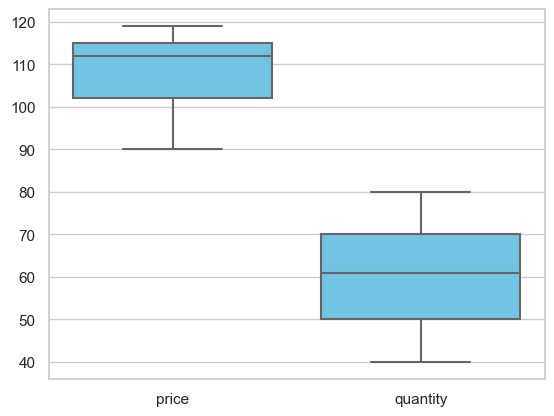

In [225]:
# Select the columns with numerical data
num_cols = ['price', 'quantity']

# Convert the data type of the 'age' column to float
customers_merged['age'] = customers_merged['age'].astype(float)

# Create a box plot for the selected columns
sns.boxplot(data=customers_merged[num_cols])

In [226]:
# Select the columns with numerical data
num_cols = ['price_per_unit', 'quantity', 'total_price']

# Calculate the IQR for each column
Q1 = sales[num_cols].quantile(0.25)
Q3 = sales[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
outlier_upper_bound = Q3 + 1.5 * IQR
outlier_lower_bound = Q1 - 1.5 * IQR

# Identify outliers in each column
outliers = {}
for col in num_cols:
    outliers[col] = sales[(sales[col] < outlier_lower_bound[col]) | (sales[col] > outlier_upper_bound[col])]
    print(f"Number of outliers in '{col}': {len(outliers[col])}")


Number of outliers in 'price_per_unit': 0
Number of outliers in 'quantity': 0
Number of outliers in 'total_price': 0


<Figure size 800x600 with 0 Axes>

<AxesSubplot: xlabel='sales_id'>

Text(0.5, 1.0, 'sales_id Distribution')

Text(0.5, 0, 'Column Values')

<AxesSubplot: xlabel='order_id'>

Text(0.5, 1.0, 'order_id Distribution')

Text(0.5, 0, 'Column Values')

<AxesSubplot: xlabel='product_id'>

Text(0.5, 1.0, 'product_id Distribution')

Text(0.5, 0, 'Column Values')

<AxesSubplot: xlabel='price_per_unit'>

Text(0.5, 1.0, 'price_per_unit Distribution')

Text(0.5, 0, 'Column Values')

<AxesSubplot: xlabel='quantity'>

Text(0.5, 1.0, 'quantity Distribution')

Text(0.5, 0, 'Column Values')

<AxesSubplot: xlabel='total_price'>

Text(0.5, 1.0, 'total_price Distribution')

Text(0.5, 0, 'Column Values')

<Figure size 800x600 with 0 Axes>

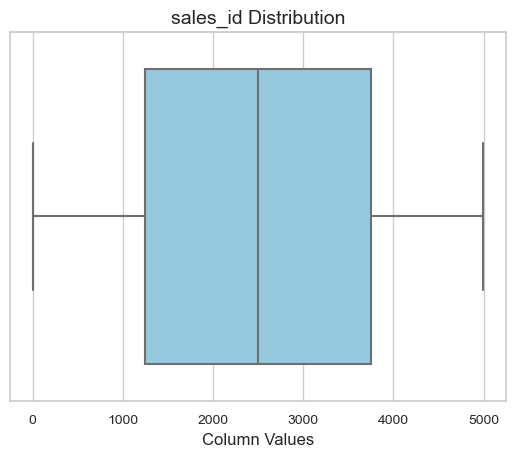

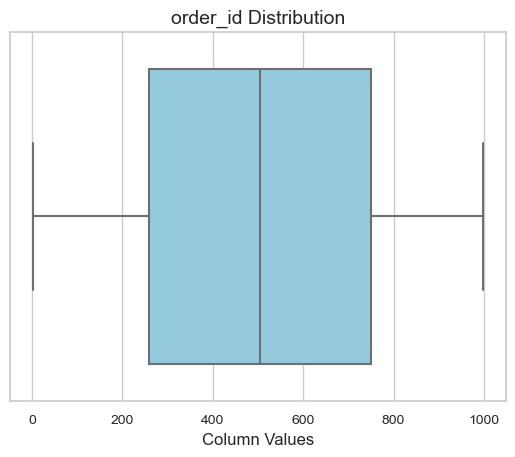

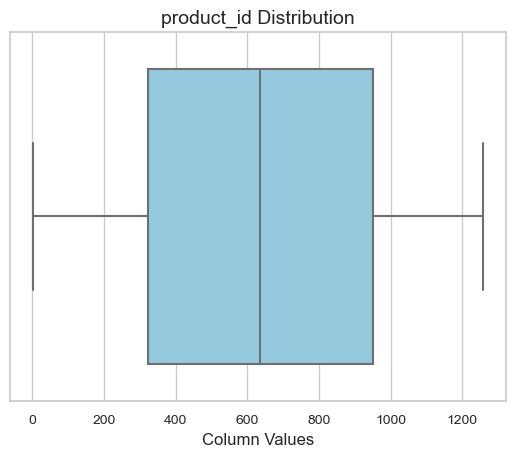

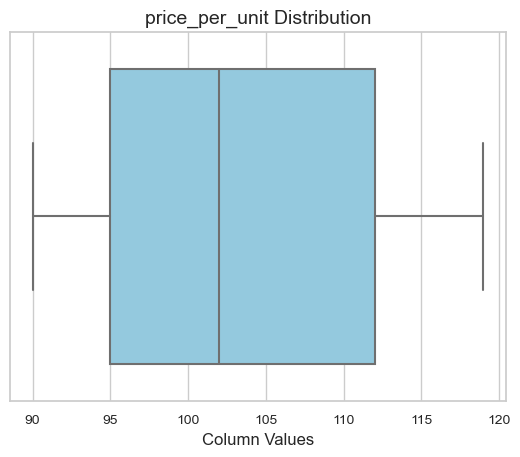

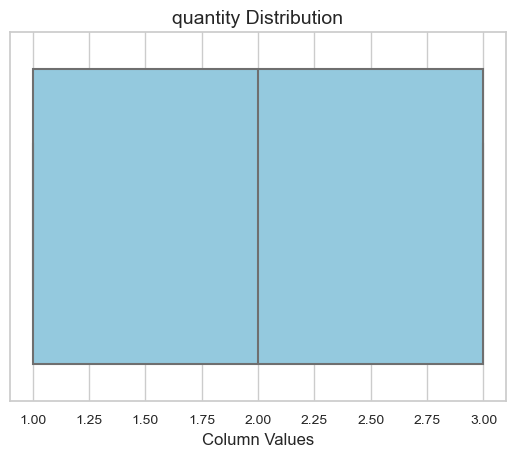

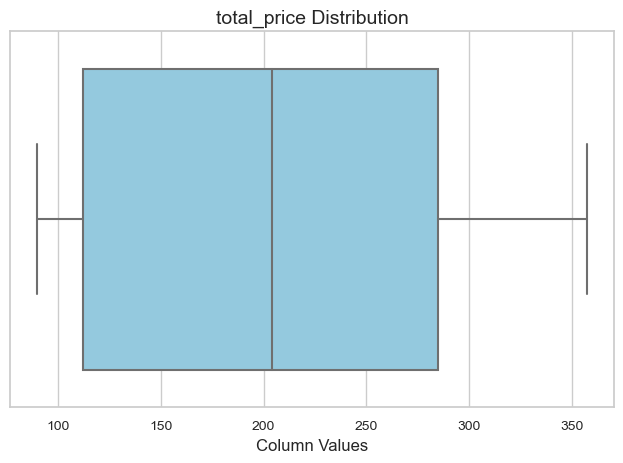

In [227]:
# Set figure size and style
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")

# Create a boxplot for each numeric column to identify outliers
for col in sales.select_dtypes(include=['int64', 'float64']).columns:
    fig, ax = plt.subplots()
    sns.boxplot(x=sales[col], color='skyblue')
    ax.set_title(f"{col} Distribution", fontsize=14)
    ax.set_xlabel("Column Values", fontsize=12)
    ax.tick_params(labelsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [228]:
# Check for inconsistent data in the 'gender' column
unique_values = customers_merged['gender'].unique()
print("Unique values in 'gender' column: ", unique_values)

# Check for any inconsistent values in 'gender' column
inconsistent_values = [val for val in customers_merged['gender'] if val not in unique_values]
if len(inconsistent_values) > 0:
    print("Inconsistent values in 'gender' column: ", inconsistent_values)
else:
    print("No inconsistent values found in 'gender' column.")

Unique values in 'gender' column:  ['Female' 'Genderfluid' 'Polygender' 'Bigender' 'Agender' 'Male'
 'Genderqueer' 'Non-binary']
No inconsistent values found in 'gender' column.


In [229]:
# Detecting inconsistent data entry for age column
age_stats = customers_merged['age'].describe()
age_range = age_stats['max'] - age_stats['min']
age_q1, age_q3 = np.percentile(customers_merged['age'], [25, 75])
age_iqr = age_q3 - age_q1
age_upper_bound = age_q3 + 1.5 * age_iqr
age_lower_bound = age_q1 - 1.5 * age_iqr

# Identifying rows with inconsistent age values
inconsistent_age_rows = customers_merged[(customers_merged['age'] < age_lower_bound) | (customers_merged['age'] > age_upper_bound)]

# Printing out the number of rows with inconsistent age values
print(f"Number of rows with inconsistent age values: {len(inconsistent_age_rows)}")

Number of rows with inconsistent age values: 0


In [230]:
customers_merged.loc[:, ['age','payment', 'price', 'quantity']].describe()

,age,payment,price,quantity
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.860000,33972.936000,108.095000,60.371000
std,17.647828,14451.609047,9.158048,11.606812
min,20.000000,10043.000000,90.000000,40.000000
25%,34.000000,21329.250000,102.000000,50.000000
50%,50.000000,33697.500000,112.000000,61.000000
75%,65.000000,46249.000000,115.000000,70.000000
max,80.000000,59910.000000,119.000000,80.000000


In [231]:
#Find numeric variables

numeric = customers_merged.select_dtypes(["int", "float"]).columns
for num_col in numeric:
    print(f"{num_col} : {customers_merged[num_col].nunique()}")


customer_id_x : 1000
age : 61
zip_code : 955
order_id : 1000
customer_id_y : 617
payment : 995
product_id : 1000
price : 21
quantity : 41


In [232]:
#Find categorical variables

categorical = customers_merged.select_dtypes(["category", "object"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {customers_merged[cat_col].nunique()}")

customer_name : 1000
gender : 8
home_address : 1000
city : 961
state : 8
country : 1
order_date : 291
delivery_date : 305
product_type : 3
product_name : 28
size : 5
colour : 7


In [233]:
# Create sales column
customers_merged["sales"] = customers_merged["price"] * customers_merged["quantity"] 

In [234]:
customers_merged['order_date'] = pd.to_datetime(customers_merged['order_date'])

In [235]:
# Create Year Column
customers_merged['year_order'] = customers_merged['order_date'].dt.year

# Create Month Column
customers_merged['month_order'] = customers_merged['order_date'].dt.month

# Create Day Column
customers_merged["day_order"] = customers_merged["order_date"].dt.day

# Correlation Matrix

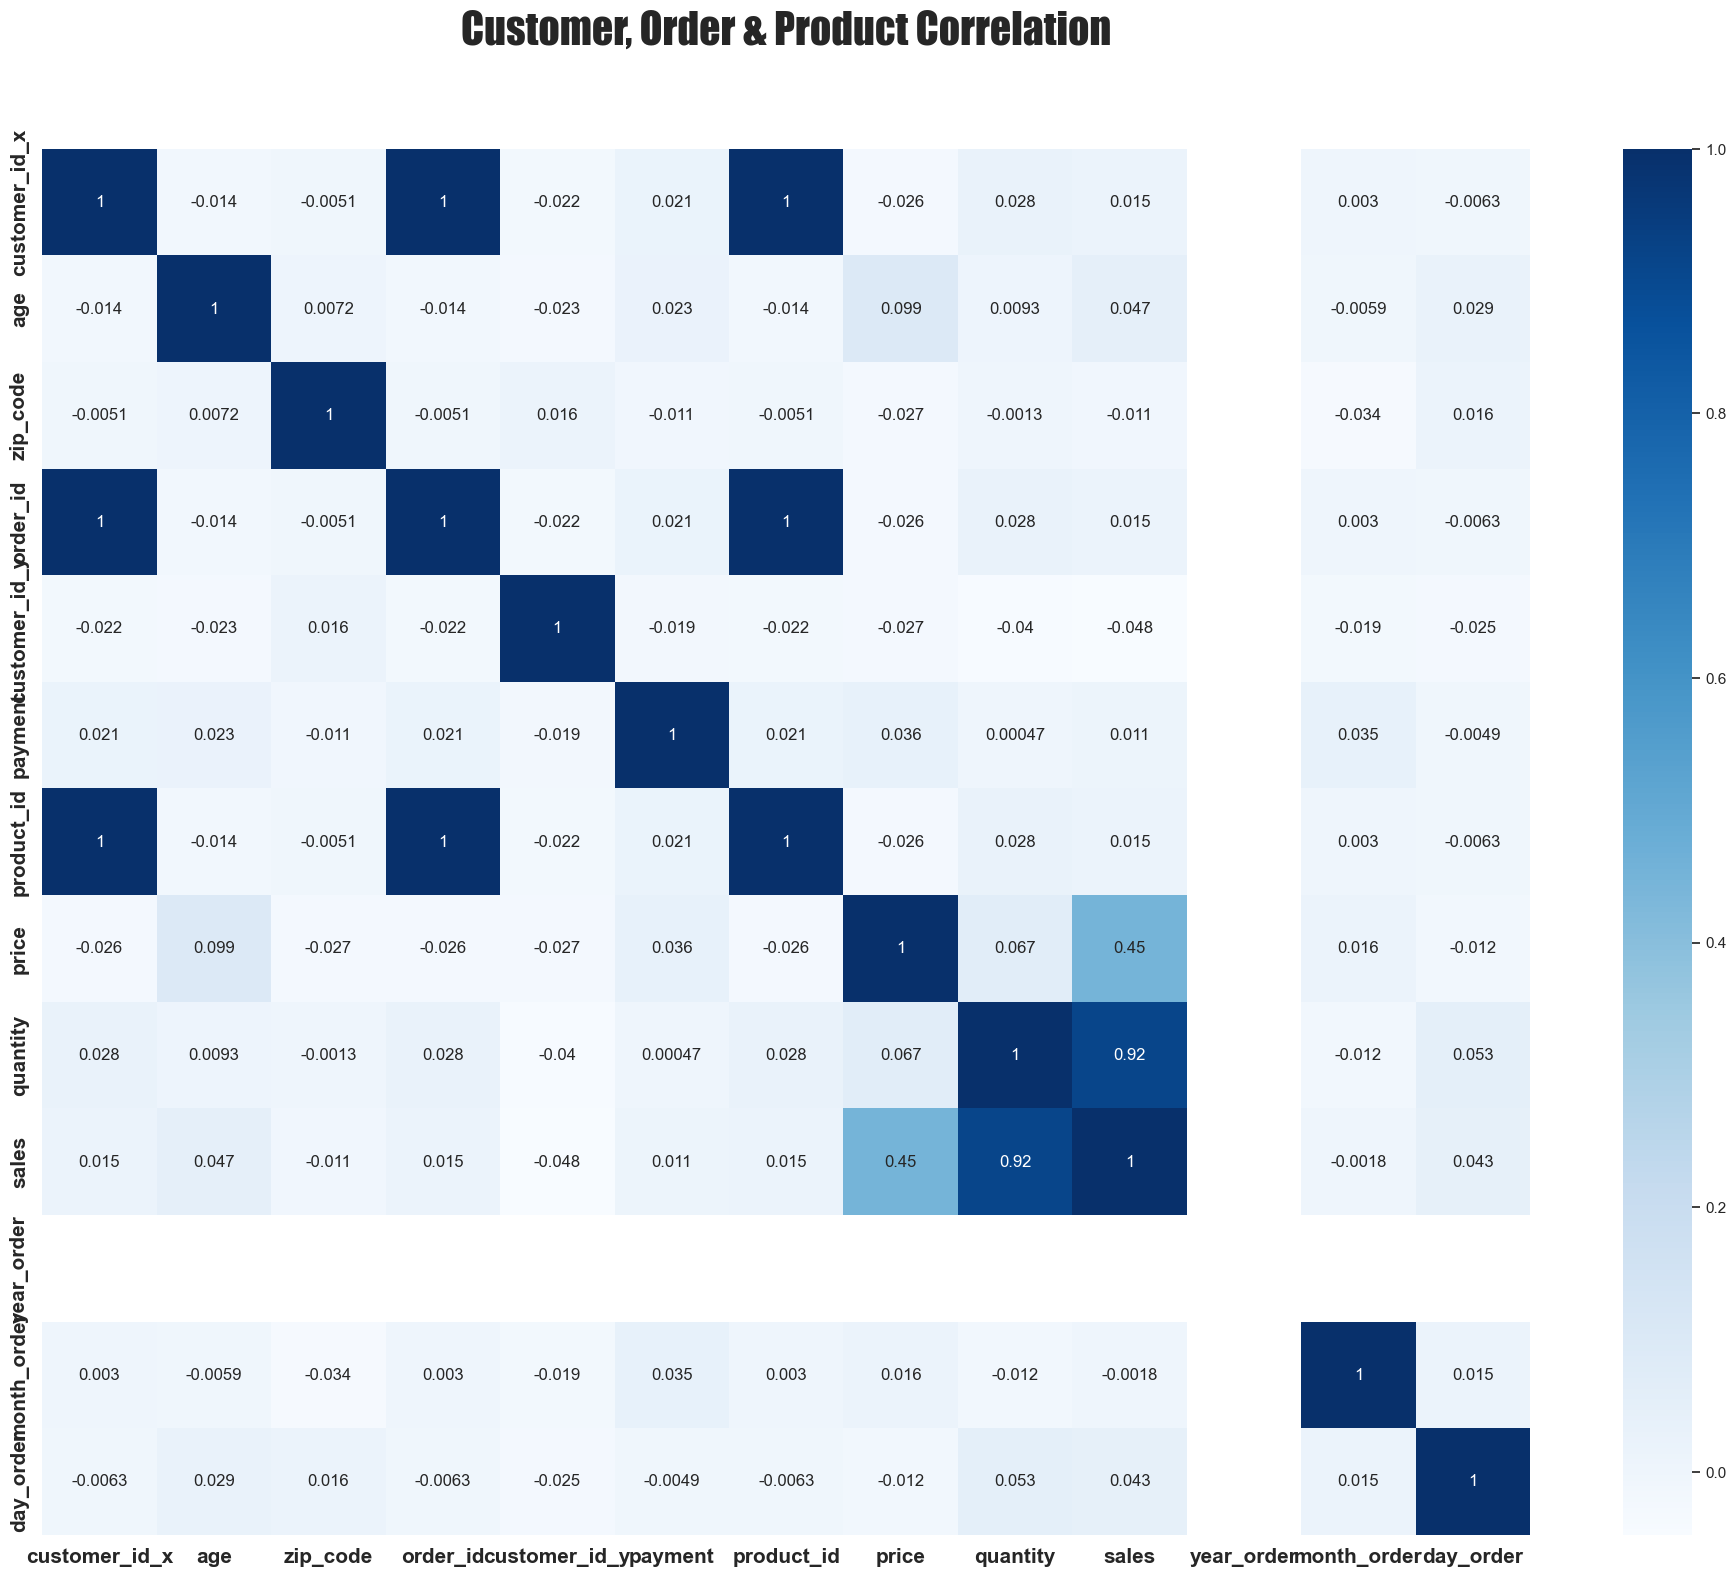

In [236]:
# Set seaborn style
sns.set_style("whitegrid") 

# Create figure and axis objects
fig = plt.figure(dpi=100, figsize=(24, 18))

# Create Heatmap
sns.heatmap(customers_merged.corr(), annot=True, cmap="Blues") 

plt.title("Customer, Order & Product Correlation", weight="bold", fontsize=30, fontname="fantasy", pad=75) 
plt.xticks(weight="bold", fontsize=15) 
plt.yticks(weight="bold", fontsize=15); 

(array([105.,  97.,  95.,  94., 100.,  92., 111., 100.,  94., 112.]),
 array([20., 26., 32., 38., 44., 50., 56., 62., 68., 74., 80.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Distribution of Customer Ages')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Count')

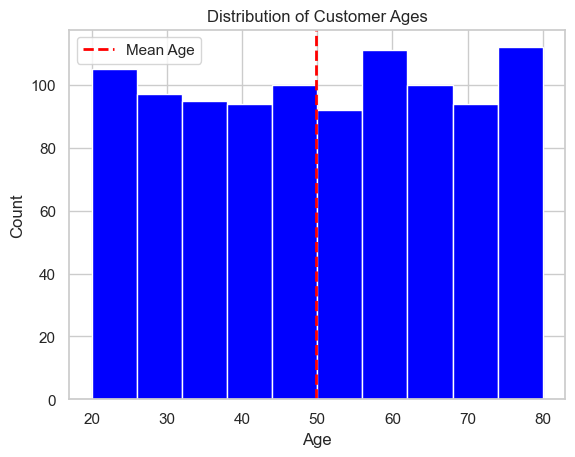

In [237]:
# What is the distribution of customer ages in the data set?

mean_age = customers['age'].mean()

plt.hist(customers_merged['age'], bins=10, color='blue')
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label='Mean Age')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

In [238]:
# What is the range of order dates in the sales data set?

min_date = customers_merged['order_date'].min()
max_date = customers_merged['order_date'].max()

print("Range of order dates in sales data set: {}-{}".format(min_date, max_date))

Range of order dates in sales data set: 2021-01-01 00:00:00-2021-10-24 00:00:00


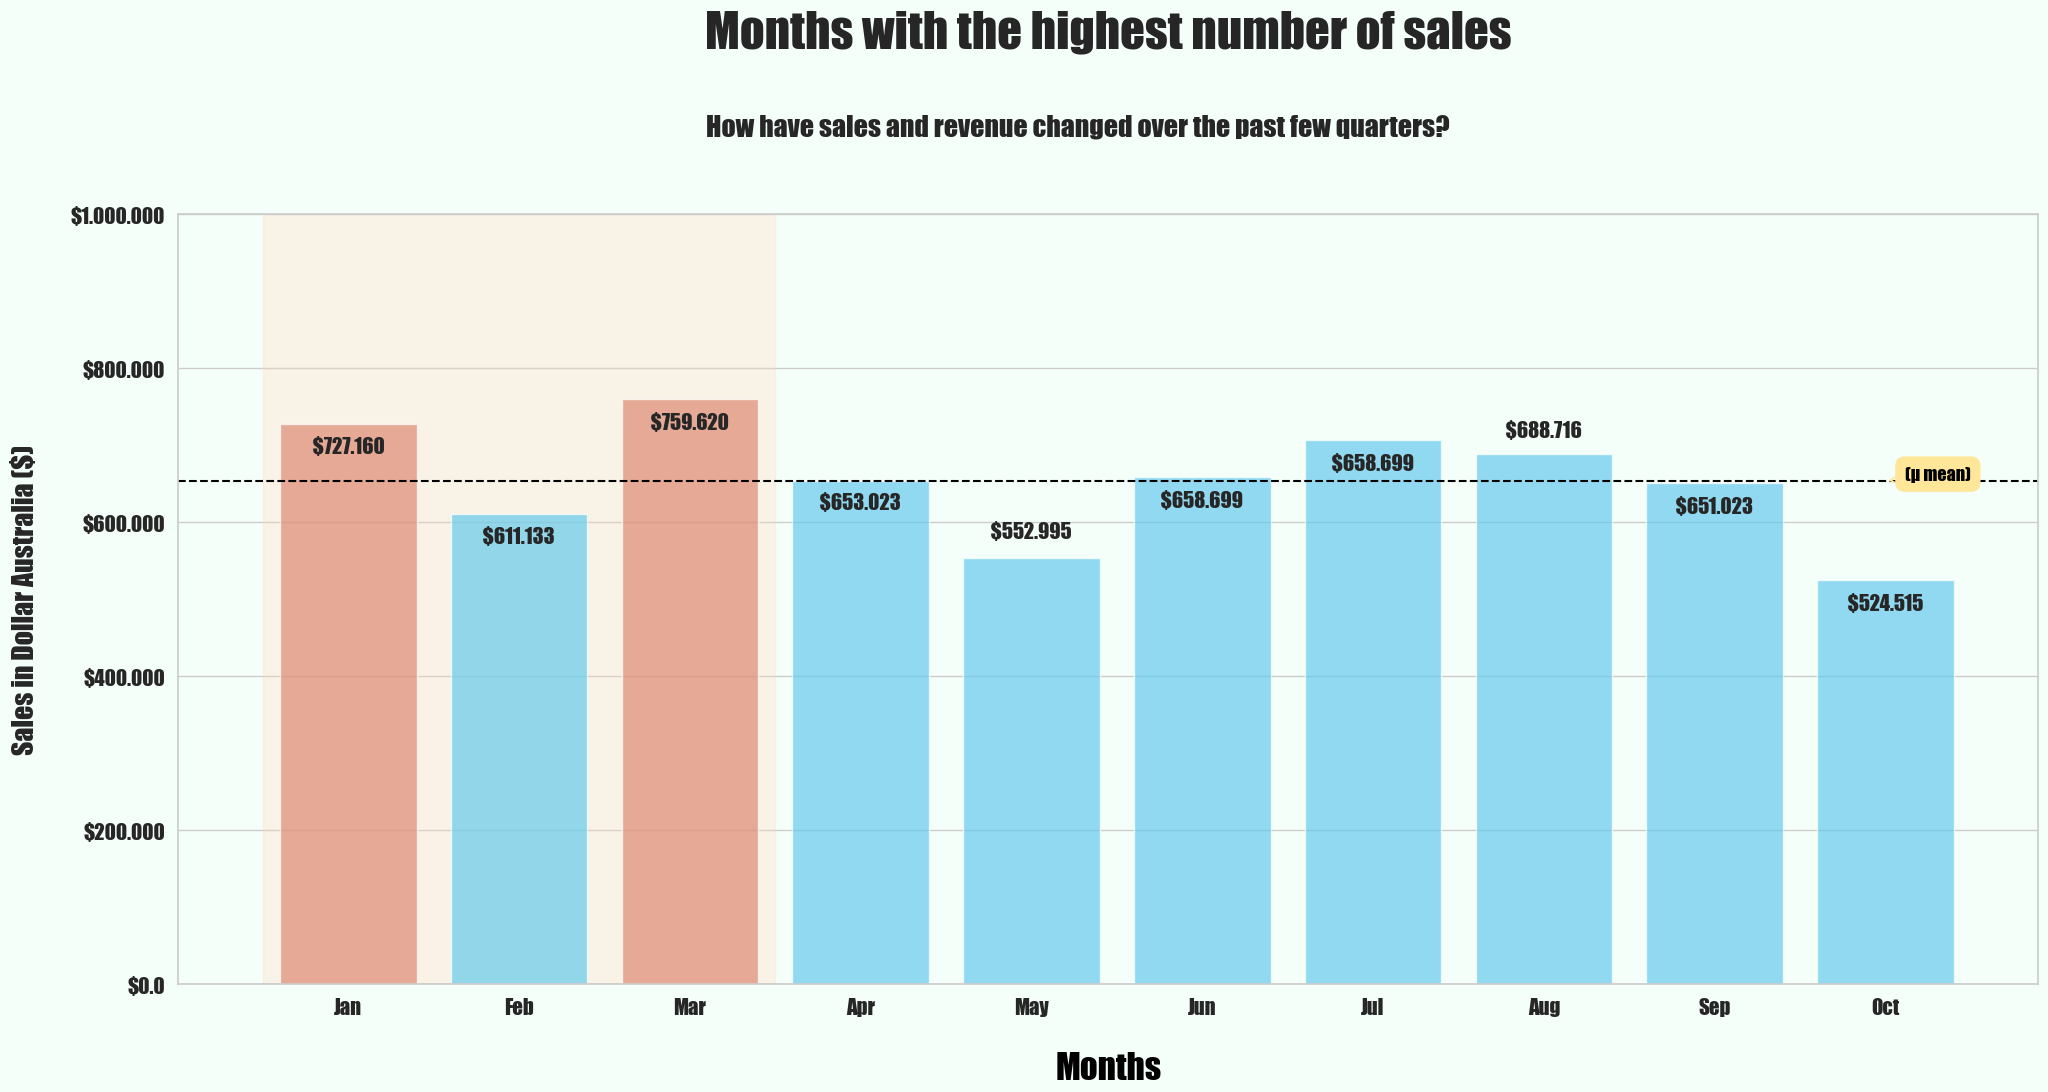

In [239]:
# set-up
color_map = ["#5FCDF5" for _ in range(20)]
color_map[0] = "#E3866F"
color_map[2] = "#E3866F"
sns.set_palette(sns.color_palette(color_map))
span_range = [-0.5, 2.5]

# group the Month cols
sum_month_order = customers_merged.groupby(["month_order"]).sum().astype("int")

# let's plot it
fig, ax = plt.subplots(
    1, 1, 
    figsize=(24, 10), 
    facecolor="mintcream")

# makes bar plot 
sns.barplot(
    x=sum_month_order.index,
    y=sum_month_order["sales"], 
    data=sum_month_order,
    zorder=2,
    palette=color_map,
    saturation=.9,
    alpha=.7,
    ax=ax) 

# title 
ax.set_title(
    "Months with the highest number of sales", 
    fontname="fantasy", 
    weight="bold", 
    fontsize=35, 
    pad=120)

plt.suptitle(
    "How have sales and revenue changed over the past few quarters?", 
    fontname="fantasy",
    weight="bold",
    fontsize=20)

# labels
ax.set_xlabel( 
    "Months", 
    weight="bold", 
    color="black",
    family="fantasy",
    fontsize=25, 
    loc="center",
    labelpad=25)
ax.set_ylabel(
    "Sales in Dollar Australia ($)", 
    weight="bold", 
    family="fantasy",
    fontsize=20,
    labelpad=25)

# ticklabels
ax.set_xticklabels( 
    labels=["Jan", "Feb", "Mar", "Apr", "May", 
            "Jun", "Jul", "Aug", "Sep", "Oct"],
    weight="bold", 
    family="fantasy",
    fontsize=15)
ax.set_yticklabels( 
    labels=["$0.0", "$200.000", "$400.000", 
            "$600.000", "$800.000", "$1.000.000"],
    weight="bold",
    family="fantasy",
    fontsize=15)

# y-limit
ax.set_ylim(0, 1000000)

# face-color
ax.set_facecolor("mintcream")

# text 
ax.text(0, 765000-66000, " $727.160 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(1, 648500-66000, " $611.133 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(2, 797200-66000, " $759.620 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(3, 693000-66000, " $653.023 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(4, 589000, " $552.995 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(5, 696000-66000, " $658.699 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(6, 743000-66000, " $658.699 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(7, 719900, " $688.716 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(8, 688000-66000, " $651.023 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(9, 562000-66000, " $524.515 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

# annotate
ax.annotate("(μ mean)", xy=(9, sum_month_order["sales"].mean()), 
             xytext=(9.5, sum_month_order["sales"].mean() + 9000),
             size=13, ha='right', va="center", color="black", 
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

# axv-span
ax.axvspan(
    span_range[0], 
    span_range[1], 
    color="peachpuff", 
    alpha=0.3)

# axh-line
ax.axhline(
    y=sum_month_order["sales"].mean(), 
    color="black", 
    ls="--", 
    lw=1.5);

In [240]:
### set-up
labels = ["0-30yo", "31-40yo", "41-50yo", "51-60yo", "61-70yo", "71-80yo"]
bins= [30, 31, 41, 51, 61, 71, 80]
customers_merged["age_group"] = pd.cut(customers_merged["age"], bins=bins, labels=labels, right=False)
sum_total_age = [660,  5652,  7382,  9209, 10890, 10883]
sum_age_group = pd.DataFrame({"age": labels, "sum_total_age": sum_total_age})
color_map = ["#5FCDF5" for _ in range(6)]
color_map[5] = "#E3866F"
color_map[4] = "#E3866F"
sns.set_palette(sns.color_palette(color_map))
span_range = [3.5, 5.5]
span_range2 = [[-0.15, 0.14], 
               [0.85, 1.14], 
               [1.85, 2.14], 
               [2.85, 3.14], 
               [3.85, 4.14], 
               [4.85, 5.14]]

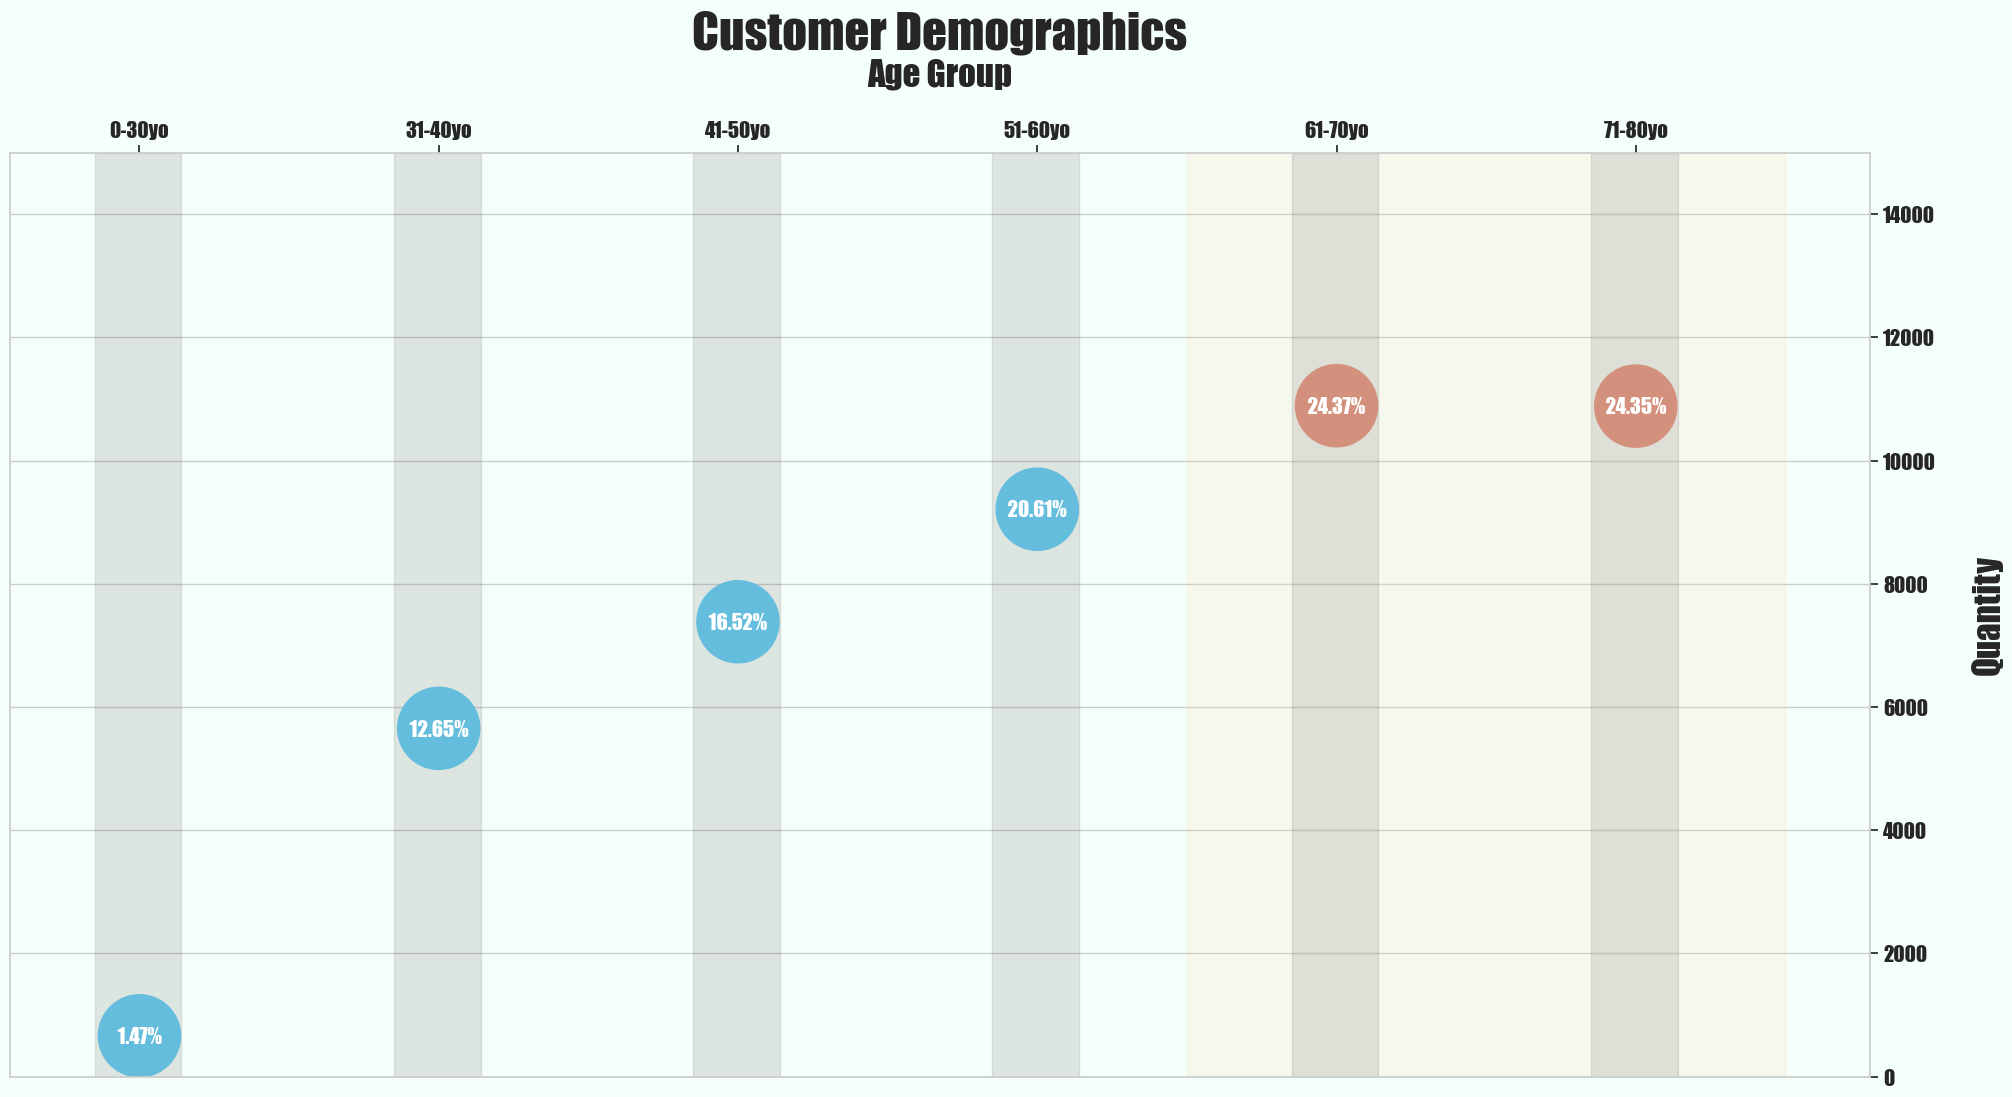

In [241]:
# subplots
fig, ax = plt.subplots(
    1, 1, 
    figsize=(24, 12), 
    facecolor=("mintcream"))

# countplot
ax.scatter(
    sum_age_group["age"], 
    sum_age_group["sum_total_age"], 
    color=color_map,
    s=3500,
    zorder=1)

# title
ax.set_title(
    "Customer Demographics", 
    fontname="fantasy",
    weight="bold",
    fontsize=35,
    pad=75)

# axv-span
ax.axvspan(span_range[0], span_range[1], color="peachpuff", alpha=0.2)
ax.axvspan(span_range2[0][0], span_range2[0][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[1][0], span_range2[1][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[2][0], span_range2[2][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[3][0], span_range2[3][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[4][0], span_range2[4][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[5][0], span_range2[5][1], color="gray", alpha=0.2)
# labels
ax.set_xlabel(
    "Age Group", 
    weight="bold", 
    family="fantasy", 
    fontsize=25,
    labelpad=25)
ax.set_ylabel(
    "Quantity", 
    weight="bold", 
    family="fantasy", 
    fontsize=25,
    labelpad=25)

# ticklabels
ax.set_xticklabels(
    labels=labels, 
    weight="bold", 
    fontsize=15,
    family="fantasy")
ax.set_yticklabels(
    labels=list(np.arange(0, 16000, 2000)), 
    weight="bold", 
    fontsize=15,
    family="fantasy")

# text
ax.text(0, 660, " 1.47% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(1, 5652, " 12.65% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(2, 7382, " 16.52% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(3, 9209, " 20.61% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(4, 10890, " 24.37% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(5, 10883, " 24.35% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

# adjust ticks
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")

# y-limit
ax.set_ylim(0, 15000)

ax.grid(b=None, which="major", axis="x")

# face-color
ax.set_facecolor("mintcream");

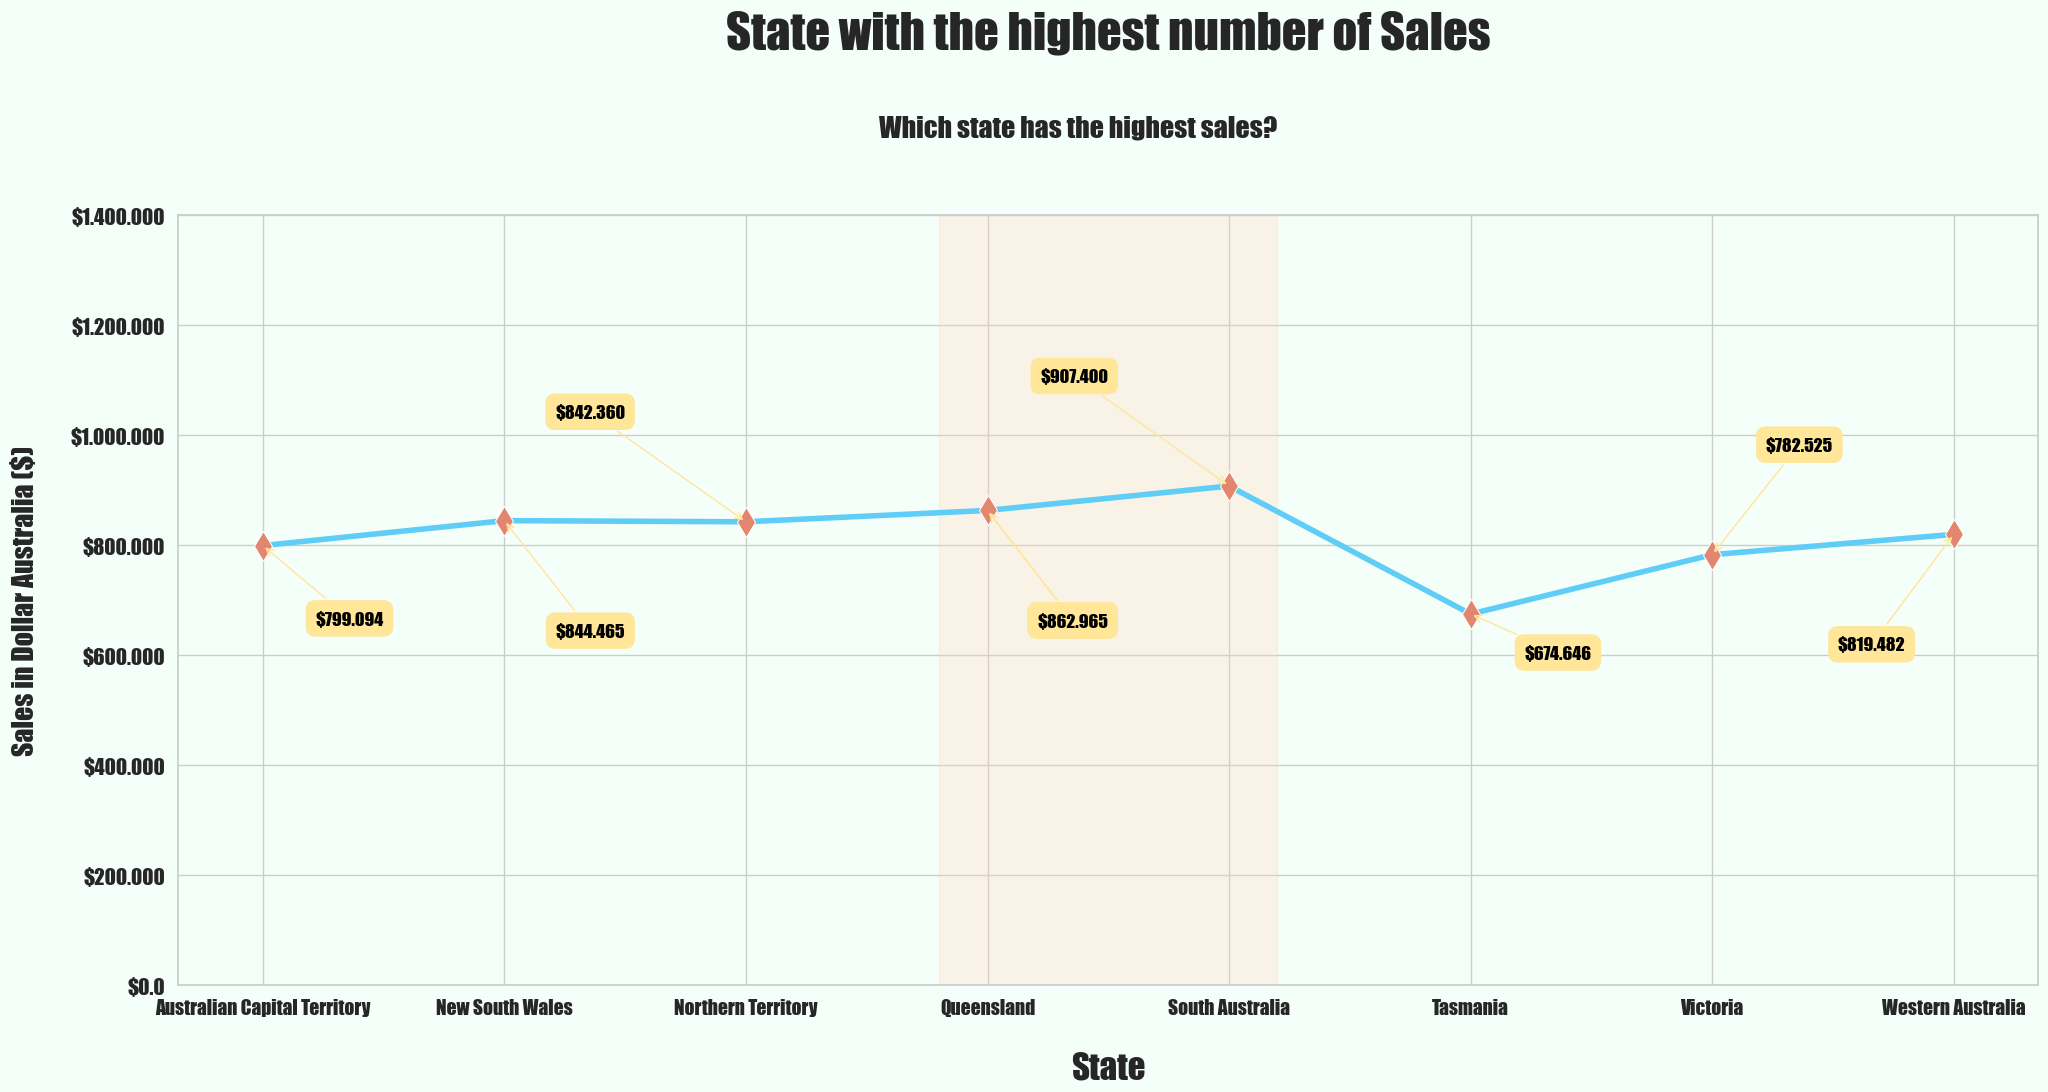

In [242]:
# set-up
color_map = ["#5FCDF5" for _ in range(8)]
color_map[4] = color_map[3] = "#E3866F"
sns.set_palette(sns.color_palette(color_map))
state = ['Australian Capital Territory', 'New South Wales', 'Northern Territory', 'Queensland',
         'South Australia', 'Tasmania', 'Victoria', 'Western Australia']
values = [799094, 844465, 842360, 862965, 907400, 674646, 782525, 819482]
state_sales = pd.DataFrame({"state": state, "values": values})
span_range = [2.8, 4.2]

# let's plot it
fig, ax = plt.subplots(
    1, 1,
    figsize=(24, 10),
    facecolor="mintcream")

# makes bar plot 
sns.lineplot(
    x=state_sales["state"],
    y=state_sales["values"],
    data=state_sales,
    marker="d",
    markersize=15,
    markerfacecolor="#E3866F",
    lw=4,
    color="#5FCDF5",
    ax=ax)

# title
ax.set_title( # title
    "State with the highest number of Sales", 
    fontname="fantasy",
    weight="bold",
    fontsize=35,
    pad=120)
plt.suptitle(
    "Which state has the highest sales?", 
    fontname="fantasy",
    weight="bold",
    fontsize=20)

# labels
ax.set_xlabel(
    "State", 
    family="fantasy",
    weight="bold",
    fontsize=25,
    loc="center",
    labelpad=25)
ax.set_ylabel( # y-label
    "Sales in Dollar Australia ($)", 
    family="fantasy",
    weight="bold",
    fontsize=20, 
    loc="center",
    labelpad=25)

# ticklabels
ax.set_xticklabels(
    labels=state_sales["state"],
    weight="bold", 
    fontsize=14, 
    family="fantasy",
    rotation=0)
ax.set_yticklabels(
    labels=["$0.0",     "$200.000",
            "$400.000", "$600.000",
            "$800.000", "$1.000.000",
            "$1.200.000", "$1.400.000"],
    weight="bold",
    family="fantasy",
    fontsize=15)

# annotate
ax.annotate("$799.094", xy=(0, 799094), xytext=(0.5, 666666),
             size=13, ha='right', va="center", color="black", 
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$844.465", xy=(1, 844465), xytext=(1.5, 644465),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$842.360", xy=(2, 842360), xytext=(1.5, 1042360),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$862.965", xy=(3, 862965), xytext=(3.5, 662965),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$862.965", xy=(3, 862965), xytext=(3.5, 662965),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$907.400", xy=(4, 907400), xytext=(3.5, 1107400),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$674.646", xy=(5, 674646), xytext=(5.5, 604646),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$782.525", xy=(6, 782525), xytext=(6.5, 982525),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$819.482", xy=(7, 819482), xytext=(6.8, 619482),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

# axv-span
ax.axvspan(span_range[0], 
           span_range[1], 
           color="peachpuff", 
           alpha=0.3)

# facecolor
ax.set_facecolor("mintcream")

# y-limits
ax.set_ylim(0, 1400000);


In [243]:
# What is the average price of the products?

average_price = customers_merged['price'].mean()
print("Average price of products in products data set: ${:.2f}".format(average_price))

Average price of products in products data set: $108.09


In [244]:
# What is the range of order dates in the sales data set?

min_date = customers_merged['order_date'].min()
max_date = customers_merged['order_date'].max()

print("Range of order dates in sales data set: {}-{}".format(min_date, max_date))

Range of order dates in sales data set: 2021-01-01 00:00:00-2021-10-24 00:00:00


(array([113., 103.,  65., 119.,  76., 118., 104.,  87., 103., 112.]),
 array([ 1. ,  3.6,  6.2,  8.8, 11.4, 14. , 16.6, 19.2, 21.8, 24.4, 27. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Distribution of Delivery Times')

Text(0.5, 0, 'Days')

Text(0, 0.5, 'Count')

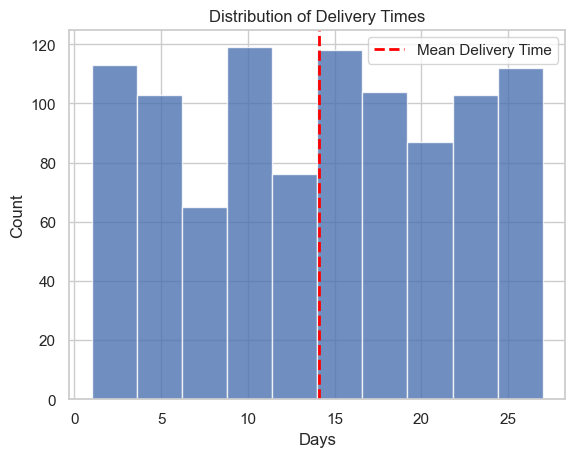

In [245]:
# What is the distribution of delivery times in the sales data set?

# Calculate delivery times and days
delivery_times = pd.to_datetime(customers_merged['delivery_date']) - pd.to_datetime(customers_merged['order_date'])
delivery_days = delivery_times.dt.days

# Calculate mean delivery time
mean_delivery_time = delivery_days.mean()

# Plot the histogram with vertical line for mean delivery time
plt.hist(delivery_days, bins=10, color='#4c72b0', alpha=0.8)
plt.axvline(mean_delivery_time, color='red', linestyle='--', linewidth=2, label='Mean Delivery Time')
plt.title('Distribution of Delivery Times')
plt.xlabel('Days')
plt.ylabel('Count')
plt.legend()
plt.show()

In [246]:
# What is the range of quantities sold in the sales data set?

min_quantity = sales['quantity'].min()
max_quantity = sales['quantity'].max()

print("Range of quantities sold in sales data set: {}-{}".format(min_quantity, max_quantity))

Range of quantities sold in sales data set: 1-3


In [247]:
# What is the total revenue generated by the sales data set?

total_revenue = sales['total_price'].sum()
print("Total revenue generated by the sales data set: ${:.2f}".format(total_revenue))

Total revenue generated by the sales data set: $1031800.00


In [248]:
# What is the most common product type in the product info data set?

most_common_product_type = customers_merged['product_type'].mode()[0]
print("Most common product type in the product info data set: ", most_common_product_type)

Most common product type in the product info data set:  Jacket


(array([0.04789272, 0.03831418, 0.01915709, 0.01915709, 0.01915709,
        0.01915709, 0.02873563, 0.05747126, 0.04789272, 0.04789272]),
 array([ 90. ,  92.9,  95.8,  98.7, 101.6, 104.5, 107.4, 110.3, 113.2,
        116.1, 119. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Distribution of Product Prices')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Density')

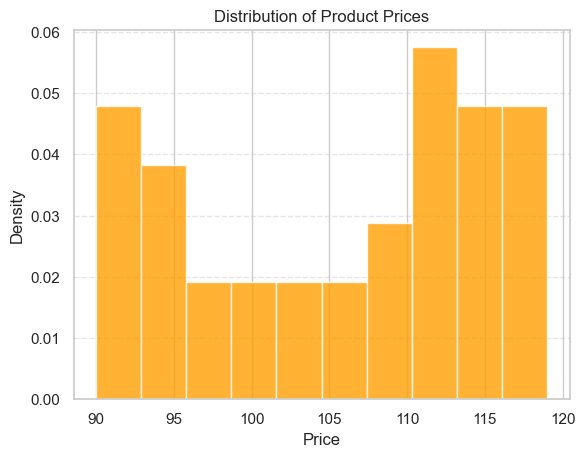

In [249]:
# What is the distribution of product prices in the product info data set?

# Plot the histogram with density curve and orange color scheme
plt.hist(products['price'], bins=10, density=True, color='#ff9f00', alpha=0.8)
plt.grid(True, axis='y', alpha=0.5, linestyle='--')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

([<matplotlib.patches.Wedge at 0x19c47067d30>,
 [Text(-0.38558775240329435, 1.030204875350809, 'Agender'),
  Text(-0.9769500896243583, 0.5055378545499422, 'Bigender'),
  Text(-1.0628159672243385, -0.2835881164876165, 'Female'),
  Text(-0.589409473607328, -0.9287607186040615, 'Genderfluid'),
  Text(0.23658388003003078, -1.0742569840172955, 'Genderqueer'),
  Text(0.9622678003109466, -0.532954670196943, 'Male'),
  Text(1.0314111247410354, 0.38234943672043353, 'Non-binary'),
  Text(0.4305109580806937, 1.0122550641871066, 'Polygender')],
 [Text(-0.2103205922199787, 0.5619299320095321, '11.4%'),
  Text(-0.5328818670678317, 0.2757479206636048, '12.0%'),
  Text(-0.5797178003041846, -0.15468442717506353, '11.5%'),
  Text(-0.3214960765130879, -0.5065967556022153, '12.2%'),
  Text(0.12904575274365312, -0.5859583549185248, '12.7%'),
  Text(0.5248733456241527, -0.29070254738015067, '14.3%'),
  Text(0.5625878862223829, 0.20855423821114555, '13.1%'),
  Text(0.2348241589531056, 0.55213912592024, '12.8

Text(0.5, 1.0, 'Number of Customers by Gender')

([<matplotlib.patches.Wedge at 0x19c470b1250>,
 [Text(-0.40371554394382886, 1.0232369029594948, 'Agender'),
  Text(-1.0058367974346187, 0.4453002772584695, 'Bigender'),
  Text(-1.0242584378170185, -0.40111675676870073, 'Female'),
  Text(-0.4614633343537407, -0.998524707279258, 'Genderfluid'),
  Text(0.3650918655039144, -1.0376453776425123, 'Genderqueer'),
  Text(0.9979187369347391, -0.4627722922502765, 'Male'),
  Text(1.0222674809853702, 0.406164002983802, 'Non-binary'),
  Text(0.42036317956889013, 1.0165110905753725, 'Polygender')],
 [Text(-0.2202084785148157, 0.558129219796088, '12.0%'),
  Text(-0.5486382531461557, 0.2428910603228015, '12.8%'),
  Text(-0.5586864206274645, -0.2187909582374731, '12.3%'),
  Text(-0.25170727328385856, -0.5446498403341407, '12.0%'),
  Text(0.19914101754758967, -0.5659883878050066, '12.5%'),
  Text(0.5443193110553122, -0.2524212503183326, '12.9%'),
  Text(0.5576004441738382, 0.22154400162752835, '13.0%'),
  Text(0.2292890070375764, 0.554460594859294, '12.5

Text(0.5, 1.0, 'Average Age by Gender')

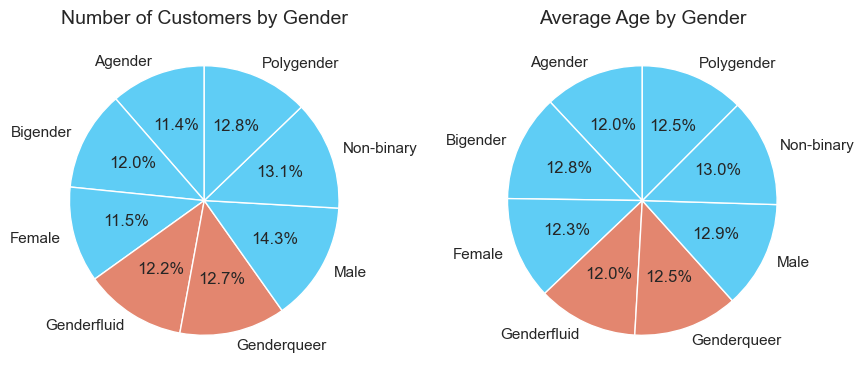

In [250]:
# Gender and age description

gender_grouped = customers_merged.groupby('gender')
gender_counts = gender_grouped.size()
gender_ages = gender_grouped['age'].mean()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Number of Customers by Gender', fontsize=14)

axs[1].pie(gender_ages.values, labels=gender_ages.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Average Age by Gender', fontsize=14)

plt.subplots_adjust(wspace=0.3)
plt.show()

In [251]:
# Count number of customers in each country
country_counts = customers_merged.groupby('country').size().sort_values(ascending=False)

# Calculate average age for customers in each country
country_ages = customers_merged.groupby('country')['age'].mean().sort_values(ascending=False)

# Calculate percentage of male and female customers in each country
gender_pct_by_country = pd.crosstab(index=customers['country'], columns=customers['gender'], normalize='index') * 100

print("Number of Customers by Country:")
print(country_counts)
print("\nAverage Age of Customers by Country:")
print(country_ages)
print("\nPercentage of Male and Female Customers by Country:")
print(gender_pct_by_country)

Number of Customers by Country:
country
Australia    1000
dtype: int64

Average Age of Customers by Country:
country
Australia    49.86
Name: age, dtype: float64

Percentage of Male and Female Customers by Country:
gender     Agender  Bigender  Female  Genderfluid  Genderqueer  Male  Non-binary  Polygender
country                                                                                     
Australia     11.4      12.0    11.5         12.2         12.7  14.3        13.1        12.8


<Figure size 1000x500 with 0 Axes>

<BarContainer object of 8 artists>

Text(0.5, 1.0, 'Distribution of Customers by State')

Text(0.5, 0, 'State')

Text(0, 0.5, 'Count')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'South Australia'),
  Text(1, 0, 'Queensland'),
  Text(2, 0, 'New South Wales'),
  Text(3, 0, 'Northern Territory'),
  Text(4, 0, 'Western Australia'),
  Text(5, 0, 'Australian Capital Territory'),
  Text(6, 0, 'Victoria'),
  Text(7, 0, 'Tasmania')])

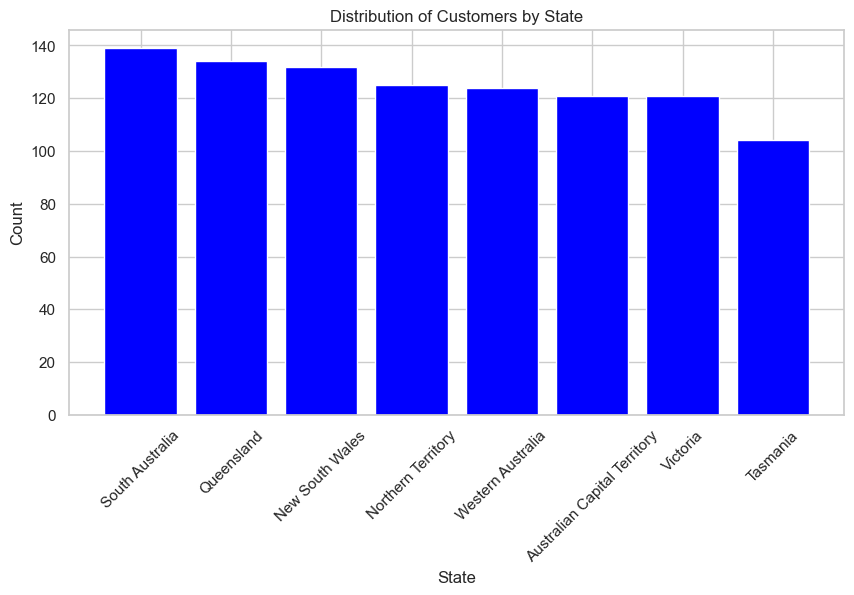

<Figure size 1000x500 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Distribution of Customers by City (Top 10)')

Text(0.5, 0, 'City')

Text(0, 0.5, 'Count')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'East Aidan'),
  Text(1, 0, 'East Sophia'),
  Text(2, 0, 'New Ava'),
  Text(3, 0, 'West Jackfort'),
  Text(4, 0, 'Corkeryshire'),
  Text(5, 0, 'Ryanberg'),
  Text(6, 0, 'South Hannah'),
  Text(7, 0, 'Feeneymouth'),
  Text(8, 0, 'Lake Jesse'),
  Text(9, 0, 'West Kai')])

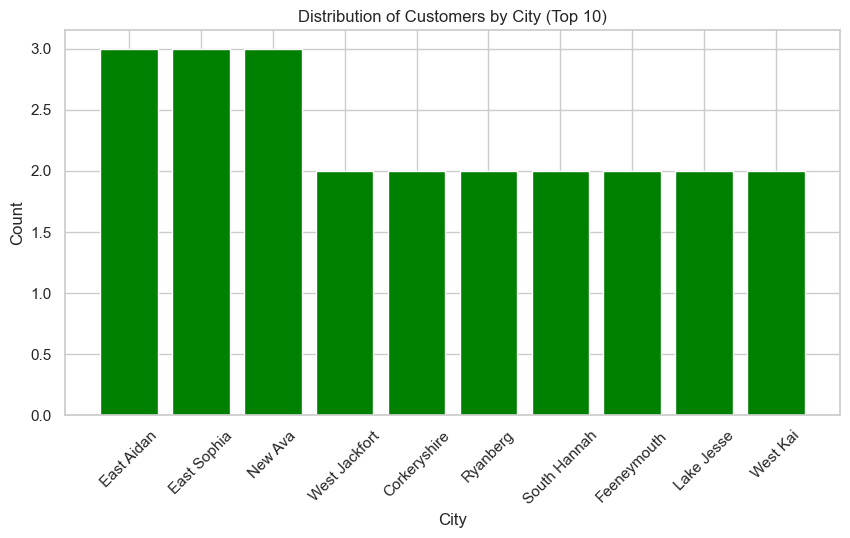

Number of Customers by Country:
country
Australia    1000
dtype: int64

Average Age of Customers by Country:
country
Australia    49.86
Name: age, dtype: float64

Percentage of Male and Female Customers by Country:
gender     Agender  Bigender  Female  Genderfluid  Genderqueer  Male  Non-binary  Polygender
country                                                                                     
Australia     11.4      12.0    11.5         12.2         12.7  14.3        13.1        12.8


In [252]:
# Count number of customers in each country
country_counts = customers_merged.groupby('country').size().sort_values(ascending=False)

# Calculate average age for customers in each country
country_ages = customers_merged.groupby('country')['age'].mean().sort_values(ascending=False)

# Calculate percentage of male and female customers in each country
gender_pct_by_country = pd.crosstab(index=customers_merged['country'], columns=customers_merged['gender'], normalize='index') * 100

# Distribution of customers by state
state_counts = customers_merged.groupby('state').size().sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.bar(state_counts.index, state_counts.values, color='blue')
plt.title('Distribution of Customers by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of customers by city
city_counts = customers_merged.groupby('city').size().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,5))
plt.bar(city_counts.index, city_counts.values, color='green')
plt.title('Distribution of Customers by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("Number of Customers by Country:")
print(country_counts)
print("\nAverage Age of Customers by Country:")
print(country_ages)
print("\nPercentage of Male and Female Customers by Country:")
print(gender_pct_by_country)

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 0 artists>

Text(0.5, 0, 'State')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of Gender by State')

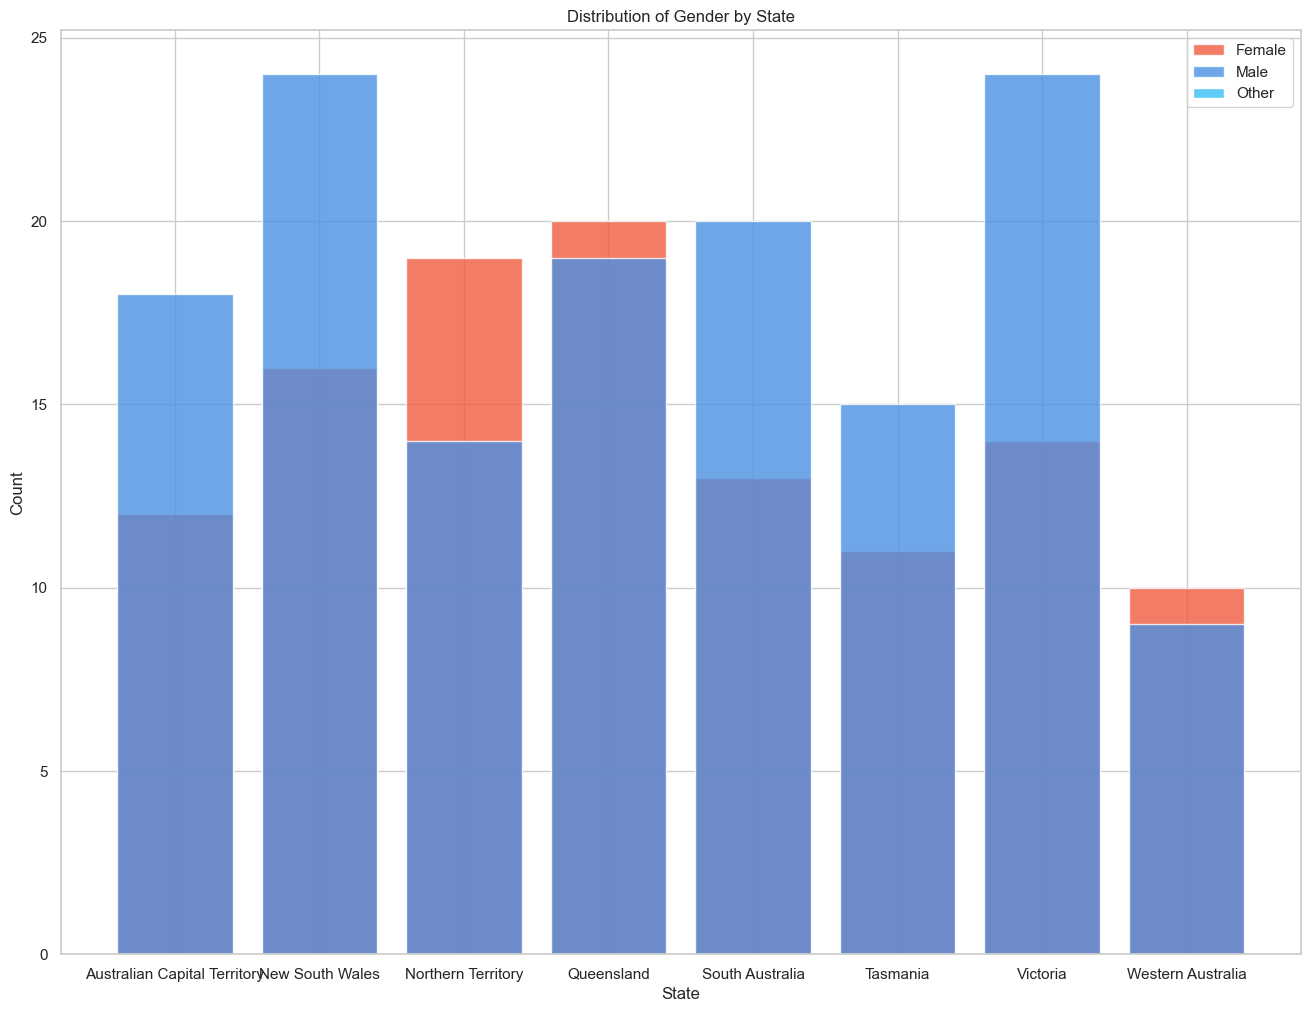

In [253]:
import matplotlib.pyplot as plt

# group customers by state and gender, and count the number of occurrences
state_gender_counts = customers_merged.groupby(['state', 'gender'])['customer_id_x'].count().reset_index()
state_gender_counts.columns = ['state', 'gender', 'count']

# plot the bar chart
fig, ax = plt.subplots(figsize=(16, 12))
for i, g in enumerate(['Female', 'Male', 'Other']):
    gender_counts = state_gender_counts[state_gender_counts['gender'] == g]
    ax.bar(gender_counts['state'], gender_counts['count'], label=g, alpha=0.8, color=['#F15B40', '#4A90E2', '#60BD68'][i])

# add labels and legend
ax.set_xlabel('State')
ax.set_ylabel('Count')
ax.set_title('Distribution of Gender by State')
ax.legend()

plt.show()

<AxesSubplot: xlabel='state', ylabel='age'>

<AxesSubplot: xlabel='state', ylabel='age'>

Text(0.5, 0, 'State')

Text(0, 0.5, 'Age')

Text(0.5, 1.0, 'Distribution of Age by State')

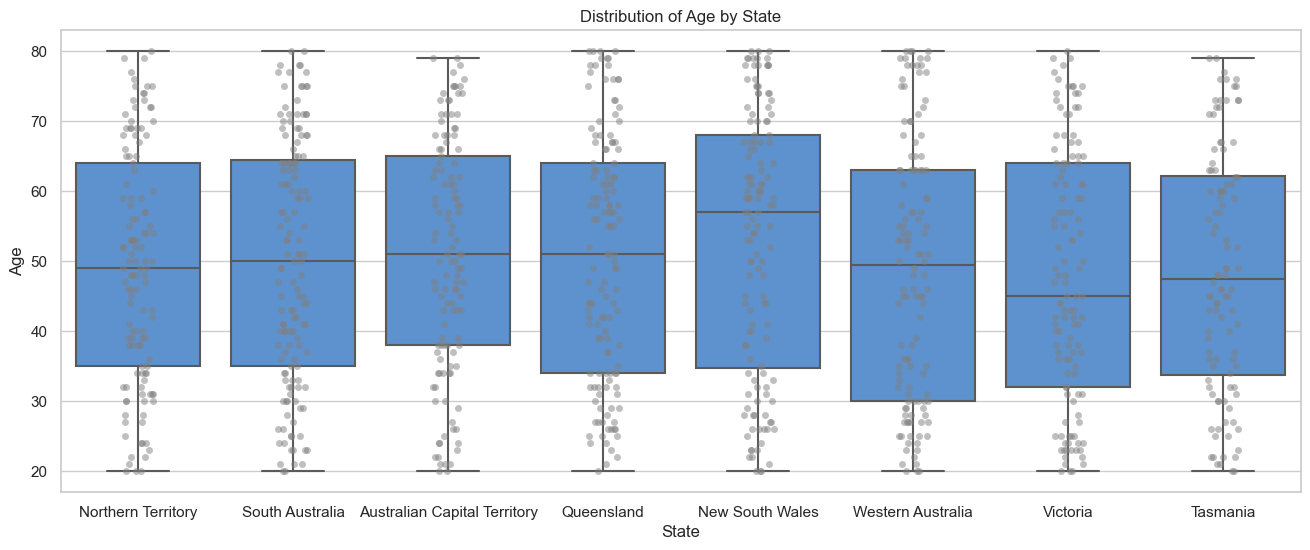

In [254]:
# plot the boxplot
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(x='state', y='age', data=customers, ax=ax, color='#4A90E2')
sns.stripplot(x='state', y='age', data=customers, ax=ax, color='grey', alpha=0.5)

# add labels and title
ax.set_xlabel('State')
ax.set_ylabel('Age')
ax.set_title('Distribution of Age by State')

plt.show()

Shirt       420
Jacket      420
Trousers    160
Name: product_type, dtype: int64


(array([175., 140.,  70.,  70.,  70.,  70., 105., 210., 175., 175.]),
 array([ 90. ,  92.9,  95.8,  98.7, 101.6, 104.5, 107.4, 110.3, 113.2,
        116.1, 119. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Distribution of Product Prices')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Count')

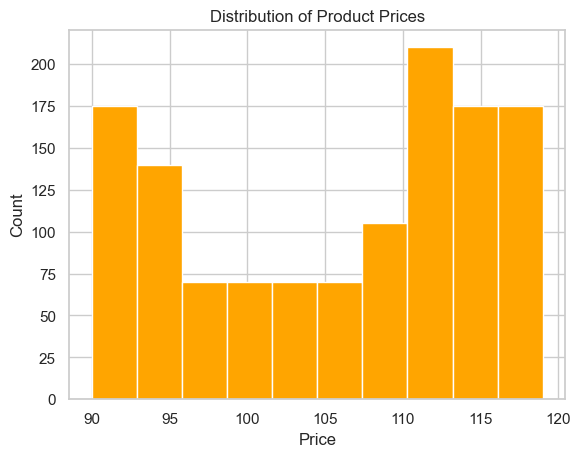

In [255]:
# Get the counts of each product type
product_type_counts = customers_merged['product_type'].value_counts()
print(product_type_counts)

# Plot the distribution of product prices
plt.hist(products['price'], bins=10, color='orange')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

(array([ 90.,  89.,  90., 102., 100., 105., 104.,  96., 104., 120.]),
 array([40., 44., 48., 52., 56., 60., 64., 68., 72., 76., 80.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Distribution of Product Quantities')

Text(0.5, 0, 'Quantity')

Text(0, 0.5, 'Count')

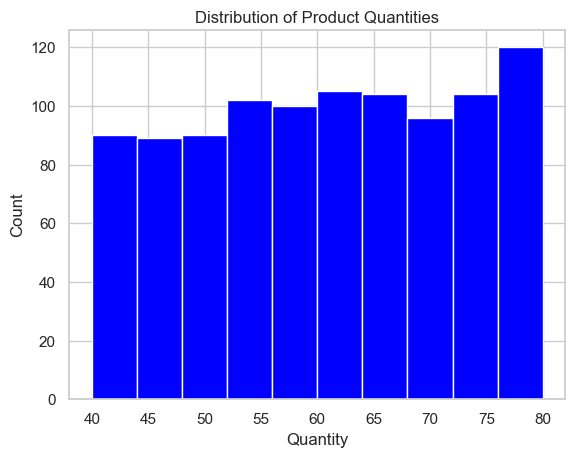

In [256]:
# Plot the distribution of product quantities
plt.hist(customers_merged['quantity'], bins=10, color='blue')
plt.title('Distribution of Product Quantities')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Distribution of Product Types')

Text(0.5, 0, 'Product Type')

Text(0, 0.5, 'Count')

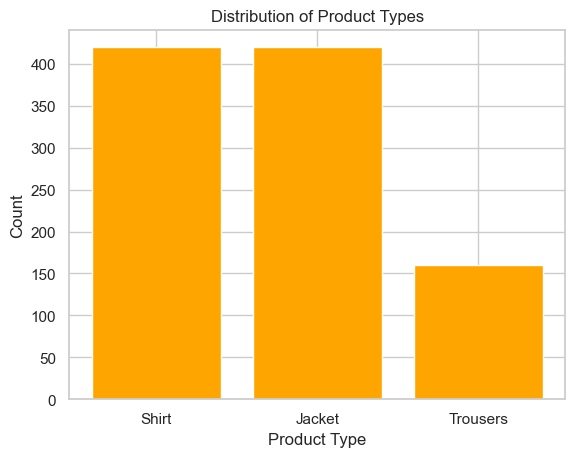

In [257]:
# Get the counts of each product type
product_type_counts = customers_merged['product_type'].value_counts()

# Plot the counts of each product type in a bar chart
plt.bar(product_type_counts.index, product_type_counts.values, color='orange')
plt.title('Distribution of Product Types')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()

In [258]:
# Print the counts of each product type
print(product_type_counts)

Shirt       420
Jacket      420
Trousers    160
Name: product_type, dtype: int64


# Analysis

Text(0.5, 0, 'Month')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '2021-01'),
  Text(1, 0, '2021-02'),
  Text(2, 0, '2021-03'),
  Text(3, 0, '2021-04'),
  Text(4, 0, '2021-05'),
  Text(5, 0, '2021-06'),
  Text(6, 0, '2021-07'),
  Text(7, 0, '2021-08'),
  Text(8, 0, '2021-09'),
  Text(9, 0, '2021-10')])

Text(0, 0.5, 'Sales')

Text(0.5, 1.0, 'Sales Trends Over Months')

The month with the highest sales was 2021-03 with a total of $131,364.00
The month with the lowest sales was 2021-10 with a total of $84,266.00


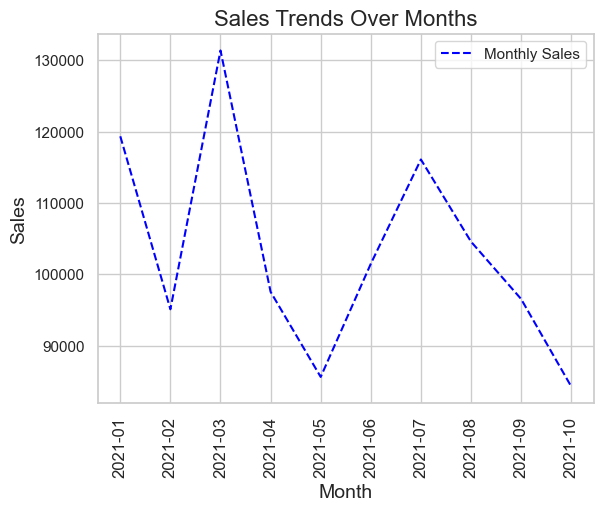

In [259]:
# Merge the sales and orders data to get the date information
sales_orders = pd.merge(sales, orders, on='order_id')

# Convert the order_date column to a pandas datetime object
sales_orders['order_date'] = pd.to_datetime(sales_orders['order_date'])

# Add a new column to the sales_orders dataframe for the month of the order
sales_orders['month'] = sales_orders['order_date'].dt.strftime('%Y-%m')

# Group the sales data by month and sum the total_price column
monthly_sales = sales_orders.groupby('month')['total_price'].sum()

# Find the month with the highest and lowest sales
highest_sales_month = monthly_sales.idxmax()
lowest_sales_month = monthly_sales.idxmin()

# Create a line graph of the monthly sales data
plt.plot(monthly_sales.index, monthly_sales.values, label='Monthly Sales', color='blue', linestyle='--')
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Sales', fontsize=14)
plt.title('Sales Trends Over Months', fontsize=16)
plt.grid(True)
plt.legend()

# Print information about the highest and lowest sales months
print(f"The month with the highest sales was {highest_sales_month} with a total of ${monthly_sales[highest_sales_month]:,.2f}")
print(f"The month with the lowest sales was {lowest_sales_month} with a total of ${monthly_sales[lowest_sales_month]:,.2f}")

plt.show()

In [260]:
# What is the total revenue generated by the sales data set?

total_revenue = sales['total_price'].sum()
print("Total revenue generated: $", total_revenue)

Total revenue generated: $ 1031800


In [261]:
# What is the average price per unit of all products sold?

avg_price_per_unit = sales['price_per_unit'].mean()
print("Average price per unit: $", avg_price_per_unit)

Average price per unit: $ 103.5016


In [262]:
# What is the total quantity of products sold?

total_quantity = sales['quantity'].sum()
print("Total quantity of products sold:", total_quantity)

Total quantity of products sold: 9962


In [263]:
# What is the most commonly sold product?

most_common_product = sales['product_id'].mode()[0]
print("Most commonly sold product:", most_common_product)

Most commonly sold product: 78


In [264]:
# What is the total revenue generated per order?

revenue_per_order = sales.groupby('order_id')['total_price'].sum()
print("Total revenue generated per order:\n", revenue_per_order)

Total revenue generated per order:
 order_id
1      1487
2      1130
3       508
4       976
5      2043
       ... 
995    1127
996    1459
997     204
998    1352
999     440
Name: total_price, Length: 993, dtype: int64


In [265]:
# What is the average quantity of products sold per order?

avg_quantity_per_order = sales.groupby('order_id')['quantity'].mean()
print("Average quantity of products sold per order:\n", avg_quantity_per_order)

Average quantity of products sold per order:
 order_id
1      2.333333
2      1.833333
3      1.666667
4      2.000000
5      2.500000
         ...   
995    1.833333
996    1.875000
997    1.000000
998    2.166667
999    1.333333
Name: quantity, Length: 993, dtype: float64


In [266]:
#What is the total revenue generated by each product?

revenue_by_product = sales.groupby('product_id')['total_price'].sum()
print("Total revenue generated by each product:\n", revenue_by_product)

Total revenue generated by each product:
 product_id
1       1152
2       1056
3        576
4       1536
5        288
        ... 
1255    1120
1256     672
1257     672
1258     784
1259    1120
Name: total_price, Length: 1233, dtype: int64


In [267]:
# Calculate total revenue per order
revenue_per_order = sales.groupby('order_id')['total_price'].sum()
revenue_per_order_df = pd.DataFrame(revenue_per_order)

# Calculate total quantity per order
quantity_per_order = sales.groupby('order_id')['quantity'].sum()
quantity_per_order_df = pd.DataFrame(quantity_per_order)

# Concatenate data frames
combined_df = pd.concat([revenue_per_order_df, quantity_per_order_df], axis=1)
combined_df.columns = ['Total Revenue', 'Total Quantity']

# Save as CSV
#combined_df.to_csv('sales_summary.csv', index=True)

<AxesSubplot: xlabel='product_name'>

Text(0.5, 1.0, 'Top 10 Products by Sales')

Text(0.5, 0, 'Product Name')

Text(0, 0.5, 'Total Sales ($)')

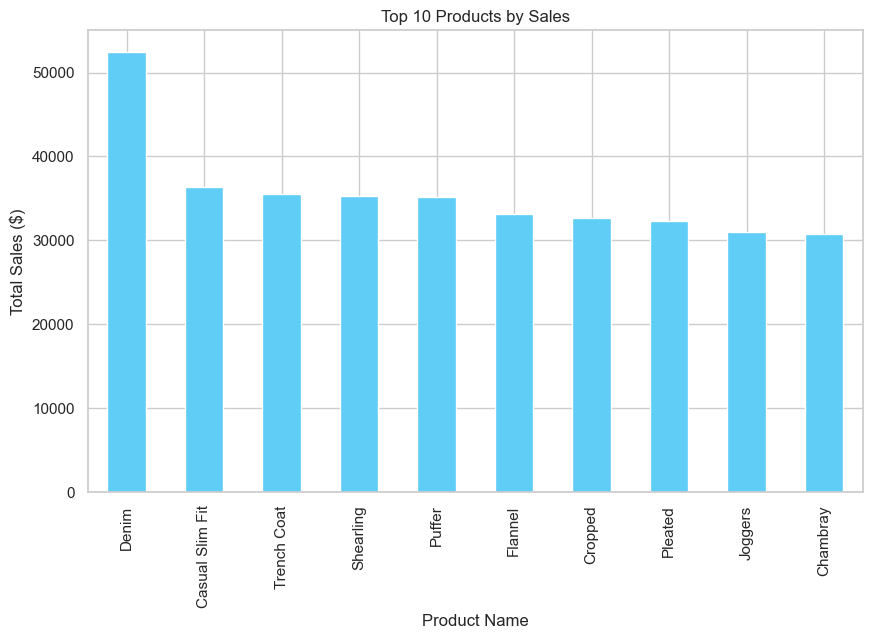

In [268]:
# Product Trends
# Merge the data into a single dataframe
sales_data = pd.merge(sales, orders, on='order_id')
sales_data = pd.merge(sales_data, products, on='product_id')
sales_data = pd.merge(sales_data, customers, on='customer_id')

# Group the sales data by product
product_sales = sales_data.groupby('product_name').sum()['total_price']

# Sort the products by their total sales
sorted_products = product_sales.sort_values(ascending=False)

# Plot the top 10 products by sales
fig, ax = plt.subplots(figsize=(10, 6))
sorted_products[:10].plot(kind='bar')
ax.set_title('Top 10 Products by Sales')
ax.set_xlabel('Product Name')
ax.set_ylabel('Total Sales ($)')

<AxesSubplot: xlabel='product_type', ylabel='total_quantity_sold'>

Text(0.5, 1.0, 'Quantity Sold by Gender for Each Product Type')

Text(0.5, 0, 'Product Type')

Text(0, 0.5, 'Quantity Sold')

<AxesSubplot: xlabel='state', ylabel='total_quantity_sold'>

Text(0.5, 1.0, 'Quantity Sold by Gender for Each State')

Text(0.5, 0, 'State')

Text(0, 0.5, 'Quantity Sold')

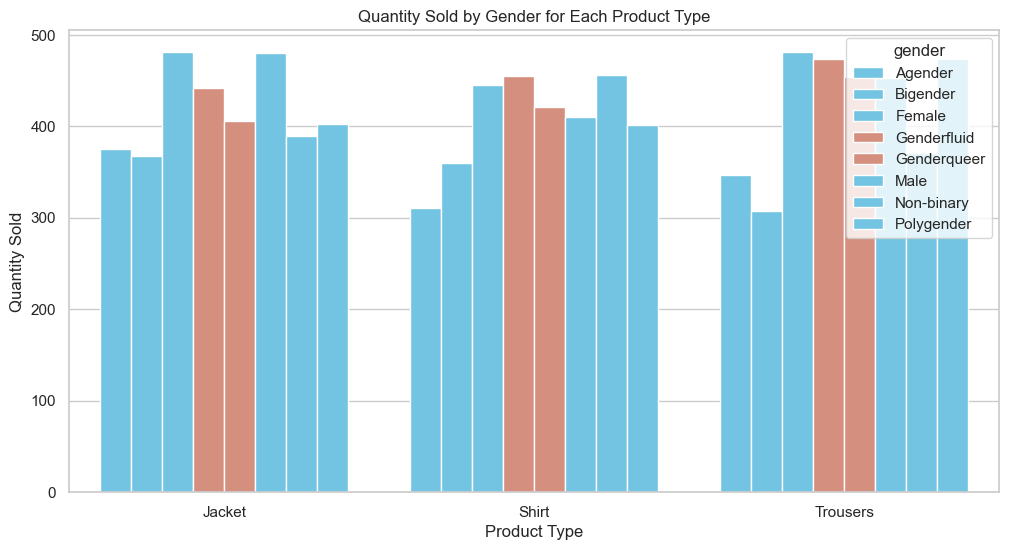

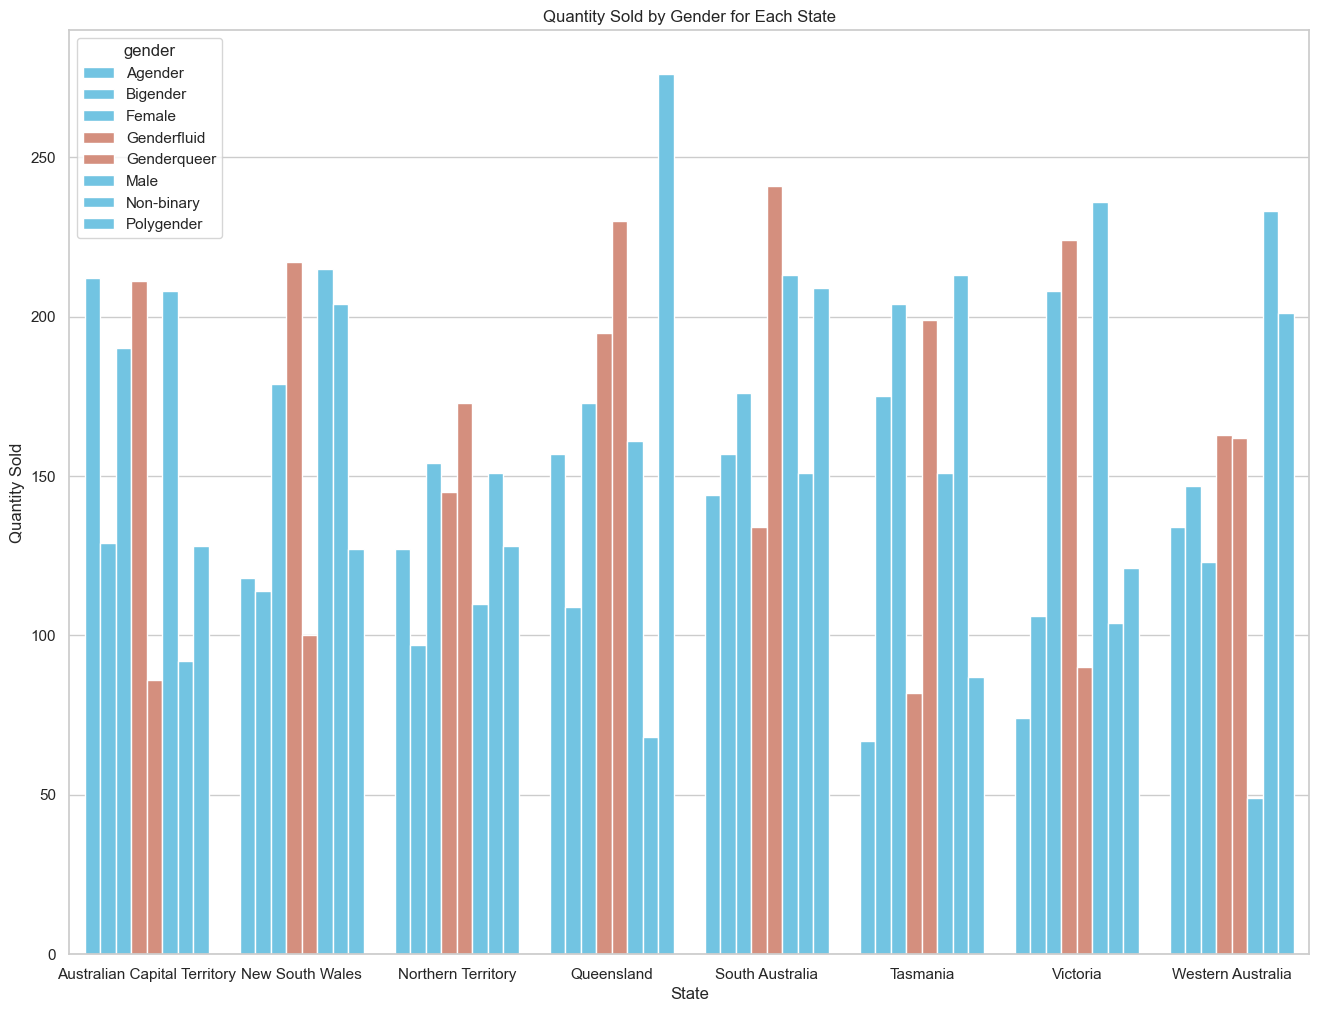

In [269]:
sales_demographic = pd.read_csv("../Queries/total_quantity_sold_gender_age_city_state_country.csv")

# Group the data by product type and gender to get the total quantity sold by gender for each product type
product_gender_sales = sales_demographic.groupby(['product_type', 'gender']).sum()['total_quantity_sold'].reset_index()

# Plot the quantity sold by gender for each product type
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='product_type', y='total_quantity_sold', hue='gender', data=product_gender_sales, ax=ax)
ax.set_title('Quantity Sold by Gender for Each Product Type')
ax.set_xlabel('Product Type')
ax.set_ylabel('Quantity Sold')

# Group the data by state and gender to get the total quantity sold by gender for each state
state_gender_sales = sales_demographic.groupby(['state', 'gender']).sum()['total_quantity_sold'].reset_index()

# Plot the quantity sold by gender for each state
fig, ax = plt.subplots(figsize=(16,12))
sns.barplot(x='state', y='total_quantity_sold', hue='gender', data=state_gender_sales, ax=ax)
ax.set_title('Quantity Sold by Gender for Each State')
ax.set_xlabel('State')
ax.set_ylabel('Quantity Sold')

[Text(0.5, 1.0, 'Quantity Sold by Age Group')]

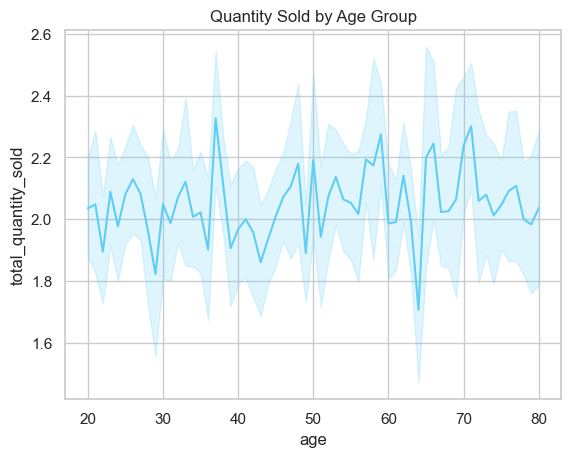

In [270]:
sns.lineplot(x='age', y='total_quantity_sold', data=sales_demographic).set(title='Quantity Sold by Age Group')

In [271]:
top_customers = customers_merged.groupby('customer_id_x').sum()['sales'].sort_values(ascending=False)
print(top_customers.head(10))

customer_id_x
700    9520
949    9520
677    9520
39     9401
607    9322
604    9322
695    9282
963    9282
955    9282
45     9282
Name: sales, dtype: int64


In [272]:
# Load the data
sales_data = pd.read_csv('../Queries/total_quantity_sold_gender_age_city_state_country.csv')

# Group the data by product name and sum the total quantity sold for each product
product_sales = sales_data.groupby('product_name')['total_quantity_sold'].sum().reset_index()

# Sort the data in descending order by total sales
sorted_sales = product_sales.sort_values('total_quantity_sold', ascending=False)

# Print the product with the highest sales
print("Product with the highest sales:")
print(sorted_sales.iloc[0])

# Print the product with the lowest sales
print("\nProduct with the lowest sales:")
print(sorted_sales.iloc[-1])

Product with the highest sales:
product_name           Denim
total_quantity_sold      527
Name: 11, dtype: object

Product with the lowest sales:
product_name           Mandarin Collar
total_quantity_sold                236
Name: 20, dtype: object


<BarContainer object of 35 artists>

Text(0.5, 1.0, 'Total Quantity Sold by Product')

Text(0.5, 0, 'Product Name')

Text(0, 0.5, 'Total Quantity Sold')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, 'Denim'),
  Text(1, 0, 'Joggers'),
  Text(2, 0, 'Pleated'),
  Text(3, 0, 'Casual Slim Fit'),
  Text(4, 0, 'Shearling'),
  Text(5, 0, 'Relaxed Leg'),
  Text(6, 0, 'Trench Coat'),
  Text(7, 0, 'Puffer'),
  Text(8, 0, 'Bomber'),
  Text(9, 0, 'Chambray'),
  Text(10, 0, 'Oxford Cloth'),
  Text(11, 0, 'Drawstring'),
  Text(12, 0, 'Slim-Fit'),
  Text(13, 0, 'Windbreaker'),
  Text(14, 0, 'Cropped'),
  Text(15, 0, 'Flannel'),
  Text(16, 0, 'Henley'),
  Text(17, 0, 'Camp Collared'),
  Text(18, 0, 'High-Waisted'),
  Text(19, 0, 'Pullover'),
  Text(20, 0, 'Linen'),
  Text(21, 0, 'Parka'),
  Text(22, 0, 'Cargo Pants'),
  Text(23, 0, 'Peacoat'),
  Text(24, 0, 'Coach'),
  Text(25, 0, 'Polo'),
  Text(26, 0, 'Leather'),
  Text(27, 0, 'Chinos'),
  Text(28, 0, 'Cardigan'),
  Text(29, 0, 'Tracks

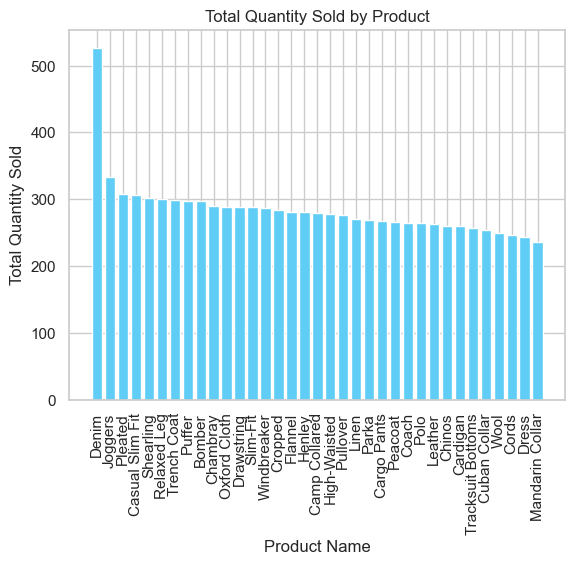

In [273]:
# Create a bar chart
plt.bar(sorted_sales['product_name'], sorted_sales['total_quantity_sold'])

# Set the chart title and axis labels
plt.title('Total Quantity Sold by Product')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

In [275]:
import pandas as pd
from tabulate import tabulate

total_quantity_sold_df = pd.read_csv('../Queries/total_quantity_sold.csv')

# Merge the sales and products dataframes on the product id
sales_prod_merged_df = pd.merge(sales, products[['product_id', 'product_type', 'size', 'price']], left_on='product_id', right_on='product_id')

# Calculate the revenue for each product type and size combination
sales_prod_merged_df['total_revenue'] = sales_prod_merged_df['quantity'] * sales_prod_merged_df['price']

grouped_df = sales_prod_merged_df.groupby(['product_type', 'size'])['total_revenue'].sum().reset_index()

# Sort the dataframe in descending order by total revenue
sorted_df = grouped_df.sort_values(by='total_revenue', ascending=False)

# Display the top 10 most profitable product types and sizes
print("Top 10 most profitable product types and sizes:")
print(tabulate(sorted_df.head(10), headers='keys', tablefmt='psql'))

Top 10 most profitable product types and sizes:
+----+----------------+--------+-----------------+
|    | product_type   | size   |   total_revenue |
|----+----------------+--------+-----------------|
|  7 | Shirt          | S      |           74731 |
|  4 | Jacket         | XS     |           74458 |
|  1 | Jacket         | M      |           73251 |
|  0 | Jacket         | L      |           72548 |
|  2 | Jacket         | S      |           72339 |
|  6 | Shirt          | M      |           71589 |
| 13 | Trousers       | XL     |           70475 |
| 11 | Trousers       | M      |           70022 |
|  9 | Shirt          | XS     |           70001 |
| 10 | Trousers       | L      |           69863 |
+----+----------------+--------+-----------------+


<Figure size 1200x800 with 0 Axes>

<AxesSubplot: xlabel='total_revenue', ylabel='product_type'>

Text(0.5, 1.0, 'Top 10 Most Profitable Product Types and Sizes')

Text(0.5, 0, 'Total Revenue')

Text(0, 0.5, 'Product Type')

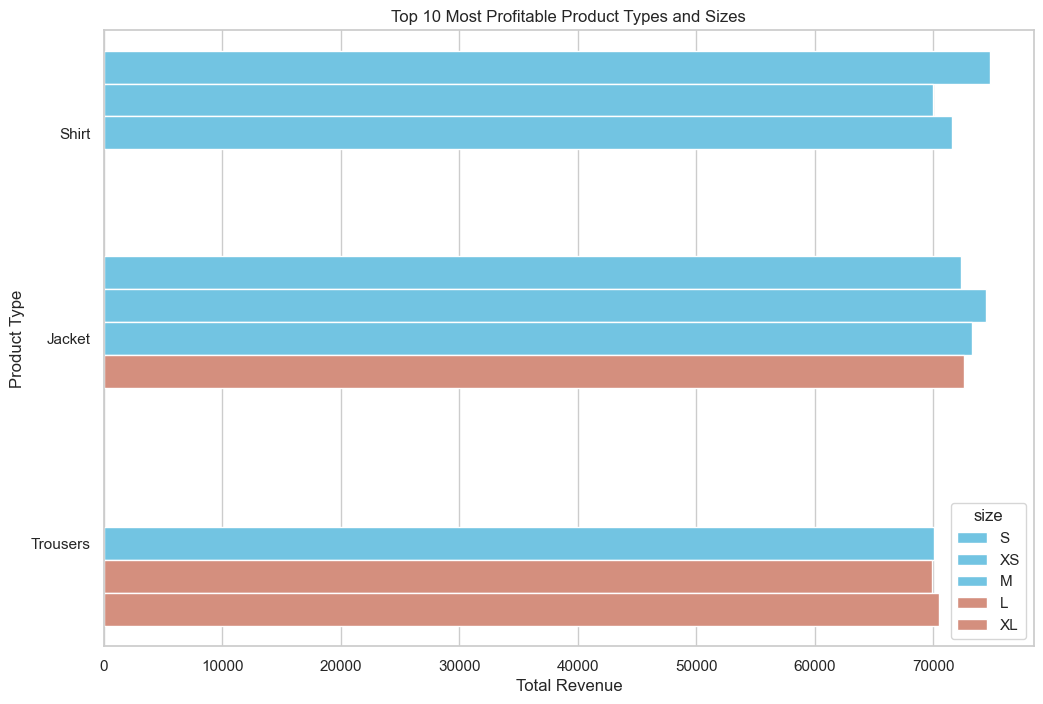

In [276]:
import seaborn as sns

# Plot the top 10 most profitable product types and sizes
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='total_revenue', y='product_type', hue='size', data=sorted_df.head(10))
plt.title('Top 10 Most Profitable Product Types and Sizes')
plt.xlabel('Total Revenue')
plt.ylabel('Product Type')
plt.show()

In [277]:
print("The Average Order Value is $206.36")

The Average Order Value is $206.36


In [280]:
# Load the data from the CSV file
sales_data = pd.read_csv('../Queries/sales_by_product.csv')

# Convert the order_date column to a datetime object
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])

# Group the data by order_date and product_name and sum the total_price
sales_data_grouped = sales_data.groupby(['order_date', 'product_name']).sum()['total_price']

# Pivot the data to create a separate series for each product
sales_data_pivoted = sales_data_grouped.unstack()

sales_data_grouped

order_date  product_name
2021-01-01  Bomber          100
            Chambray        212
            Cords           188
            Cropped         345
            Cuban Collar    105
                           ... 
2021-10-24  Oxford Cloth    192
            Peacoat         218
            Pleated         315
            Relaxed Leg      90
            Shearling       234
Name: total_price, Length: 3763, dtype: int64

In [281]:
# Group the data by product_name and sum the quantity for each product
product_sales = sales_data.groupby('product_name')['quantity'].sum()

# Sort the product sales in descending order and select the top ten rows
top_products = product_sales.sort_values(ascending=False).head(10)

# Print the top ten products sold
print(top_products)

product_name
Denim              527
Joggers            334
Pleated            308
Casual Slim Fit    306
Shearling          302
Relaxed Leg        301
Trench Coat        299
Puffer             298
Bomber             297
Chambray           290
Name: quantity, dtype: int64


# Linear Regression Model

In [294]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [295]:
# Aggregate the data by product type and calculate total revenue
revenue = customers_merged.groupby('product_type').apply(lambda x: (x['quantity']*x['price']).sum()).reset_index()
revenue.columns = ['product_type', 'revenue']

In [296]:
# Merge the revenue data with the original dataset
df = pd.merge(customers_merged, revenue, on='product_type', how='left')

In [297]:
# Select the relevant columns
X = df[['quantity']]
y = df['sales']

In [298]:
# Add a constant term to the predictor variable
X = sm.add_constant(X)

In [299]:
# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

In [300]:
# Print the summary statistics of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     5351.
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        22:27:09   Log-Likelihood:                -7743.7
No. Observations:                1000   AIC:                         1.549e+04
Df Residuals:                     998   BIC:                         1.550e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -193.4238     93.637     -2.066      0.0

In [301]:
import statsmodels.api as sm

# Select the relevant columns and split the data into training and testing sets
X = df[['quantity']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the independent variable
X_train = sm.add_constant(X_train)

# Create and train the OLS model
model = sm.OLS(y_train, X_train).fit()

# Make predictions on the test set
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

# Calculate R-squared and p-value
print(f"R-squared: {model.rsquared}")
print(f"p-value: {model.f_pvalue}")

R-squared: 0.8521994554505644
p-value: 0.0
